## Import and Installing of the needed libraries

In [ ]:
pip install py-readability-metrics

In [ ]:
pip install nltk

In [ ]:
pip install textstat

In [ ]:
pip install pyspellchecker

In [ ]:
pip install imbalanced-learn

In [ ]:
pip install scikit-learn

In [ ]:
pip install lexical-diversity

In [ ]:
pip install xgboost

In [ ]:
pip install indexer

In [ ]:
pip install spacy

In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [ ]:
pip install plotly

In [ ]:
pip install seaborn

In [ ]:
pip install ipywidgets

In [ ]:
pip install wordcloud

In [ ]:
pip install Readability

In [ ]:
pip install nltk

In [ ]:
pip install Birch

In [ ]:
pip install textblob

In [89]:
from sklearn.utils import check_array
import math
import re
import imblearn
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
import pandas as pd
import numpy as np
from lexical_diversity import lex_div as ld
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from ipywidgets import widgets
from wordcloud import WordCloud
from readability import Readability
from textstat import textstat
import nltk
from nltk import punkt 
from spellchecker import SpellChecker 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import spacy
spell = SpellChecker()
import spacy.cli
import string
from sklearn.cluster import Birch
from textblob import TextBlob
from nltk.tokenize import sent_tokenize, word_tokenize
from imblearn.under_sampling import ClusterCentroids
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

## Import Data

Before we start working with the database, we first need to specify the path to it

In [28]:
df = pd.read_csv("C://Users/lizok/Desktop/Project 2/asap-aes/training_set_rel3.tsv", delimiter="\t", encoding="latin-1")

In [29]:
df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Analisys

To begin working on the database, it's important to study it and conduct a detailed analysis of the data  
This information will help us to create an action plan of normalization and will help to better understand our data .

df.shape will show us the shape of the data set. 

In [30]:
df.shape

(12976, 28)

df.columns will list the columns we have in our database

In [31]:
df.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

Thanks to df.info command we learned the data types of columns.

In [32]:
df.info

<bound method DataFrame.info of        essay_id  essay_set                                              essay  \
0             1          1  Dear local newspaper, I think effects computer...   
1             2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2             3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3             4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4             5          1  Dear @LOCATION1, I know having computers has a...   
...         ...        ...                                                ...   
12971     21626          8   In most stories mothers and daughters are eit...   
12972     21628          8   I never understood the meaning laughter is th...   
12973     21629          8  When you laugh, is @CAPS5 out of habit, or is ...   
12974     21630          8                                 Trippin' on fen...   
12975     21633          8   Many people believe that laughter can improve...

df.isna(). sum() will show us how many Null's we have in each column. This information will help us to understand whether the column is important or not and whether further work is needed on it.

In [33]:
df.isna().sum() 

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

Visualize the distribution of the text length

In [34]:
Essay_distribution=df['essay']

C:\Users\lizok\AppData\Local\Temp\ipykernel_14684\1351286457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Essay_distribution['text_length'] =Essay_distribution.apply(len)


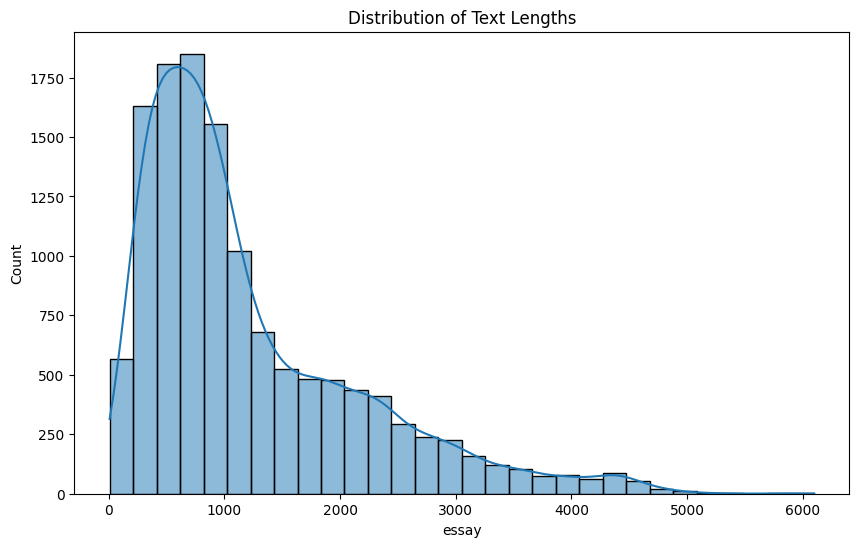

In [35]:
Essay_distribution['text_length'] =Essay_distribution.apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(Essay_distribution['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.show()

In [36]:
grouped_data_1= df.groupby('essay_set')['domain1_score'].describe()
grouped_data_1

,count,mean,std,min,25%,50%,75%,max
essay_set,,,,,,,,
1,1783.0,8.528323,1.538565,2.0,8.0,8.0,10.0,12.0
2,1800.0,3.415556,0.774512,1.0,3.0,3.0,4.0,6.0
3,1726.0,1.848204,0.815157,0.0,1.0,2.0,2.0,3.0
4,1770.0,1.432203,0.939782,0.0,1.0,1.0,2.0,3.0
5,1805.0,2.408864,0.970821,0.0,2.0,2.0,3.0,4.0
6,1800.0,2.720000,0.970630,0.0,2.0,3.0,3.0,4.0
7,1569.0,16.062460,4.585350,2.0,13.0,16.0,19.0,24.0
8,723.0,36.950207,5.753502,10.0,33.0,37.0,40.0,60.0


In [37]:
grouped_data_2= df.groupby('essay_set')['domain2_score'].describe()
grouped_data_2

,count,mean,std,min,25%,50%,75%,max
essay_set,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1800.0,3.333889,0.729103,1.0,3.0,3.0,4.0,4.0
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's us see the repartition of the essays based on the type of essays which vary form 1 to 8

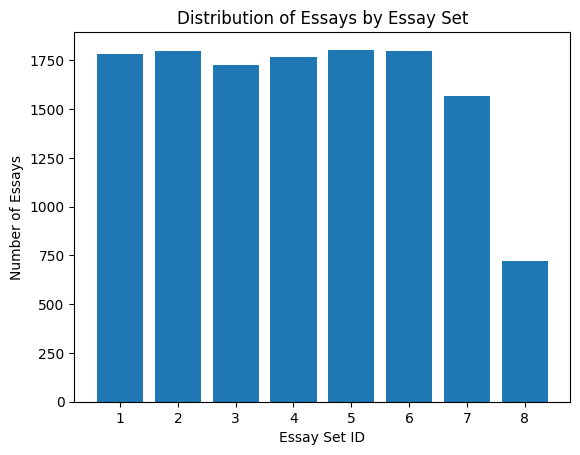

In [38]:
# Group data by column 'essay_set' and count the number 
# of tests in each group
essay_count_per_set = df.groupby('essay_set').size()

# Create a bar graph to view the distribution
plt.bar(essay_count_per_set.index, essay_count_per_set.values)

# Add labels to axes
plt.xlabel('Essay Set ID')
plt.ylabel('Number of Essays')
plt.title('Distribution of Essays by Essay Set')

# Set x-axis labels to match values from 1 to 8
plt.xticks(range(1, 9))

# Display Chart
plt.show()

Through the analisys, the can see that "rater_trait" and "rater_domain" columns are meaningless, because there are a lot of Null's and this information contains only scores of each rater. We have this information in "Domain_score" column, as it is a final result of all this columns which is depended on the essay set id. Consequently, we can delete this information.  
Domain2_score column also have Null's, but this is because it refers only to 2nd essay set id, as there scores are separeted. 
We also realized that our data does not equal the number of essay types. In the future we will have to take this into account, as it may affect the end result.

In [39]:
df = df.drop(columns=['essay_id', 'rater1_domain1', 'rater2_domain1', 'rater3_domain1', 'rater1_domain2', 'rater2_domain2',
         'rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
         'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1', 'rater3_trait2',
         'rater3_trait3', 'rater3_trait4', 'rater3_trait5', 'rater3_trait6'])
df

,essay_set,essay,domain1_score,domain2_score
0,1,"Dear local newspaper, I think effects computer...",8,NaN
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN
4,1,"Dear @LOCATION1, I know having computers has a...",8,NaN
...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,35,NaN
12972,8,I never understood the meaning laughter is th...,32,NaN
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,NaN
12974,8,Trippin' on fen...,40,NaN


This is the end of the Data Analisys, after that we can begin to normalize the data

# EDF

If we’re going to learn the model, we need to work on the data. Our table has important data in the column "essay", but this column will not give any data for the machine at the training stage because it will not be able to correctly process data type by itself, so we need to vectorize the text. In this part we will use different functions and libraries to convert this data

We also have 2 target columns "domain1_score" and "domain2_score". In this part, we normalize these columns to simplify model learning. We will also join these 2 columns so that we have only 1 target column. It will also simplify learning models and help us to get more accurate results

In [464]:
df_modified = df.copy()
df_modified

,essay_set,essay,domain1_score,domain2_score
0,1,"Dear local newspaper, I think effects computer...",8,NaN
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,NaN
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,NaN
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,NaN
4,1,"Dear @LOCATION1, I know having computers has a...",8,NaN
...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,35,NaN
12972,8,I never understood the meaning laughter is th...,32,NaN
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,NaN
12974,8,Trippin' on fen...,40,NaN


## Normalization of domain scores

In this part we will recalculate the scores received by raters. To do this, we will consider the ratio of scores to the maximum of each type of essay. For the essay set 2 we will consider the relation to the two results together. The results we will divide into 3 parts: 0 (bad), 1 (good) and 2 (excellent).  
  
The separation is done by dividing the scores by 3 equal parts. For example, the essay set 1 can have from 2 to 12 points. We will therefore divide these points into three parts:  
- from 2 to 5
- from 6 to 9
- from 10 to 12  

Then we take the maximum ratio of each part:  
- 5 -> 5/12 = 0.41666 = 0.42
- 9 -> 9/12 = 0.75  

Using these values we will use these intervals to determine the result: 
- [0, 0.42] --> 0 (bad)
- ]0.42, 0.75] --> 1 (good)
- ]0.75, 1] --> 2 (excellent)

After some calculations we determined that the intervals that will fit under all essay sets are: 
- [0, 0.42] --> 0 (bad)
- ]0.42, 0.75] --> 1 (good)
- ]0.75, 1] --> 2 (excellent)

These are the intervals we will use in our function.  
Using these calculations, the function produces an end result.  


The function itself at the input takes the whole database. Inside the function we createa'maxi' n arrxi, which contains the maximum values of eacessay setay. The output of the function produces a database with the result as a new columnстолбца

In [ ]:
def transform_data(df):
    maxi = [12, 10, 3, 3, 4, 4, 30, 60]
    all_averages = []
    all_categories = []

    for i in range(1, 9):
        df_max = maxi[i-1]
        if i == 2:
            average = (df.domain2_score.loc[(df['essay_set'] == i)] + df.domain1_score.loc[(df['essay_set'] == i)]) / df_max
        else:
            average = df.domain1_score.loc[(df['essay_set'] == i)] / df_max
        
        category = pd.cut(average, bins=[-float('inf'), 0.42, 0.75, float('inf')], labels=['0', '1', '2'])
        all_categories.append(category)

    df['Score'] = pd.concat(all_categories, ignore_index=True)

    return df

# Call the function with your dataframe
#df_modified = transform_data(df_modified)

#df_modified

x = transform_data(df_modified)
x

After that we can delete domain1 and domain2 scores

In [466]:
df_modified = df_modified.drop(columns=['domain1_score', 'domain2_score'])
df_modified

,essay_set,essay,Score
0,1,"Dear local newspaper, I think effects computer...",1
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2
4,1,"Dear @LOCATION1, I know having computers has a...",1
...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1
12972,8,I never understood the meaning laughter is th...,1
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1
12974,8,Trippin' on fen...,1


## Word structure

### Word Count

Word Count will count the number of words in the text. The lambda function retrieves the text of the essay at the input, divides the text into words, focusing on spaces with the help of the .split() function, and at the output returns the number of words

In [467]:
df_modified['word_count'] = df_modified.essay.apply(lambda x: len(str(x).split()))

In [468]:
df_modified

,essay_set,essay,Score,word_count
0,1,"Dear local newspaper, I think effects computer...",1,338
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,419
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,279
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2,524
4,1,"Dear @LOCATION1, I know having computers has a...",1,465
...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1,845
12972,8,I never understood the meaning laughter is th...,1,546
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1,817
12974,8,Trippin' on fen...,1,562


### Counting the number of unique word and the number of adjectives

In [470]:
# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")


# Function to calculate unique word count
def calculate_unique_word_count(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Calculate unique words
    unique_words = set(token.text.lower() for token in doc if token.is_alpha)

    return len(unique_words)

# Function to count adjectives
def count_adjectives(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Count occurrences of adjectives
    adjectives = [token.text.lower() for token in doc if token.pos_ == "ADJ"]
    adjective_counts = Counter(adjectives)

    return adjective_counts

# Apply the functions to each row in the DataFrame
df_modified['unique_word_count'] = df_modified['essay'].apply(calculate_unique_word_count)
df_modified['adjective_counts'] = df_modified['essay'].apply(count_adjectives)

# Display the DataFrame with calculated metrics
df_modified

,essay_set,essay,Score,word_count,unique_word_count,adjective_counts
0,1,"Dear local newspaper, I think effects computer...",1,338,157,"{'dear': 1, 'local': 2, 'great': 2, 'new': 4, ..."
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,419,186,"{'many': 5, 'able': 1, '@num1': 2, 'less': 1, ..."
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,279,140,"{'dear': 1, 'more': 3, 'positive': 1, 'differe..."
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2,524,224,"{'many': 1, 'true': 1, 'most': 4, 'close': 1, ..."
4,1,"Dear @LOCATION1, I know having computers has a...",1,465,194,"{'dear': 1, 'positive': 1, 'great': 1, '@num1'..."
...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1,845,299,"{'most': 1, 'high': 1, 'current': 1, 'differen..."
12972,8,I never understood the meaning laughter is th...,1,546,192,"{'shortest': 1, '@num1': 1, 'puppy': 1, 'real'..."
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1,817,337,"{'sure': 1, 'technical': 1, 'true': 1, 'funny'..."
12974,8,Trippin' on fen...,1,562,225,"{'@num1': 2, 'young': 1, 'short': 1, 'stupid':..."


In [471]:
df_modified['adjective_counts']

0        {'dear': 1, 'local': 2, 'great': 2, 'new': 4, ...
1        {'many': 5, 'able': 1, '@num1': 2, 'less': 1, ...
2        {'dear': 1, 'more': 3, 'positive': 1, 'differe...
3        {'many': 1, 'true': 1, 'most': 4, 'close': 1, ...
4        {'dear': 1, 'positive': 1, 'great': 1, '@num1'...
                               ...                        
12971    {'most': 1, 'high': 1, 'current': 1, 'differen...
12972    {'shortest': 1, '@num1': 1, 'puppy': 1, 'real'...
12973    {'sure': 1, 'technical': 1, 'true': 1, 'funny'...
12974    {'@num1': 2, 'young': 1, 'short': 1, 'stupid':...
12975    {'many': 1, 'daily': 1, 'better': 1, 'happy': ...
Name: adjective_counts, Length: 12976, dtype: object

In [472]:
df_modified['total_adjectives'] = df_modified['adjective_counts'].apply(lambda d: sum(d.values()))
df_modified['total_adjectives']

0        18
1        22
2        19
3        40
4        30
         ..
12971    43
12972    38
12973    39
12974    43
12975    39
Name: total_adjectives, Length: 12976, dtype: int64

In [473]:
df_modified = df_modified.drop(columns='adjective_counts')
df_modified

,essay_set,essay,Score,word_count,unique_word_count,total_adjectives
0,1,"Dear local newspaper, I think effects computer...",1,338,157,18
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,419,186,22
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,279,140,19
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2,524,224,40
4,1,"Dear @LOCATION1, I know having computers has a...",1,465,194,30
...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1,845,299,43
12972,8,I never understood the meaning laughter is th...,1,546,192,38
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1,817,337,39
12974,8,Trippin' on fen...,1,562,225,43


### Counting the number of references @ in each essay

In [474]:
# Function to count "@" occurrences in a cell
def count_at_mentions(cell_text):
    return cell_text.count('@')

# Apply the function to each row in the DataFrame
df_modified['at_mentions_count'] = df_modified['essay'].apply(count_at_mentions)

# Display the DataFrame with the count of "@" mentions
df_modified['at_mentions_count']

0         5
1        10
2         7
3        41
4         4
         ..
12971    55
12972    32
12973    57
12974    20
12975    11
Name: at_mentions_count, Length: 12976, dtype: int64

## Redability metrics 

Redability metrics give an estimate of the text. They correspond to the U.S grade level of education which varies from 0-18.  
This measures the readability of the text. Higher scores indicate easier readability.

### Flesch Reading Ease

The Flesch Reading Ease gives a text a score between 1 and 100, with 100 being the highest readability score. Scoring between 70 to 80 is equivalent to school grade level 8. This means text should be fairly easy for the average adult to read.

In [476]:
from textstat import flesch_reading_ease

# Calculate Flesch Reading Ease for each essay
df_modified['flesch_reading_ease'] = df_modified['essay'].apply(flesch_reading_ease)
df_modified['flesch_reading_ease']

0        74.02
1        67.08
2        68.20
3        60.24
4        72.66
         ...  
12971    65.09
12972    91.11
12973    69.11
12974    81.83
12975    72.05
Name: flesch_reading_ease, Length: 12976, dtype: float64

### SMOG INDEX

SMOG stands for ‘Simple Measure of Gobbledygook’.  
The SMOG Index estimates the years of education needed to easily understand a piece of text based on the number of polysyllabic words present.  

In [477]:
# Function to calculate SMOG Index
import textstat
def calculate_smog_index(text):
    return textstat.smog_index(text)

# Apply the function to the 'essay' column
df_modified['smog_index'] = df_modified['essay'].apply(calculate_smog_index)

df_modified

,essay_set,essay,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,rich_vocabulary,flesch_reading_ease,smog_index
0,1,"Dear local newspaper, I think effects computer...",1,338,157,18,5,0.544379,74.02,10.2
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,419,186,22,10,0.515513,67.08,11.6
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,279,140,19,7,0.598566,68.20,12.0
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2,524,224,40,41,0.524809,60.24,12.3
4,1,"Dear @LOCATION1, I know having computers has a...",1,465,194,30,4,0.486022,72.66,11.1
...,...,...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1,845,299,43,55,0.450888,65.09,10.3
12972,8,I never understood the meaning laughter is th...,1,546,192,38,32,0.478022,91.11,7.1
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1,817,337,39,57,0.504284,69.11,9.7
12974,8,Trippin' on fen...,1,562,225,43,20,0.517794,81.83,8.5


### Flesch-Kincaid Grade Level

The Flesch Kincaid Grade Level is a widely used readability formula which assesses the approximate reading grade level of a text. If a text has a Flesch Kincaid level of 8, this means the reader needs a grade 8 level of reading or above to understand it. Even if they’re an advanced reader, it means the content is less time-consuming to read.

In [478]:
# Flesch-Kincaid Grade Level
def FK(text):
    length = len(text.split())
    if (length <= 101):
        if text[-1] == "." or text[-1] == "?" or text[-1] == "!":
            text = text + " "
        else:
            text = text + ". "
        text = text*(math.ceil(100/length)+1)
    r = Readability(text)
    fk = r.flesch_kincaid()
    score = fk.score
    return score

### Dale Chall Readability  

The New Dale-Chall readability score measures a text against a number of words considered familiar to fourth-graders. The more unfamiliar words used, the higher the reading level. The lower the score, the more readable the text for a fourth-grader.

In [479]:
# Dale Chall Readability
def DCR(text):
    length = len(text.split())
    if (length <= 101):
        if text[-1] == "." or text[-1] == "?" or text[-1] == "!":
            text = text + " "
        else:
            text = text + ". "
        text = text*(math.ceil(100/length)+1)
    r = Readability(text)
    dc = r.dale_chall()
    score = dc.score
    return score

### Coleman Liau Index 

Coleman-Liau is a readability formula which shows the reading level of a text. It uses sentences and letters as variables.

In [480]:
# Coleman Liau Index
def CLI(text):
    length = len(text.split())
    if (length <= 101):
        if text[-1] == "." or text[-1] == "?" or text[-1] == "!":
            text = text + " "
        else:
            text = text + ". "
        text = text*(math.ceil(100/length)+1)
    r = Readability(text)
    cl = r.coleman_liau()
    score = cl.score
    return score

All libraries require a minimum of 100 words. In our database we see that we have 3305 essays that do not meet the requirements of libraries.
By checking below we see that if you double the text, the value of the functions does not change much, so to evaluate the text that does not meet the requirements, we simply duplicate the text several times to increase the number of words.

In [481]:
df_modified.loc[df_modified['word_count'] < 100].count()

essay_set              3305
essay                  3305
Score                  3305
word_count             3305
unique_word_count      3305
total_adjectives       3305
at_mentions_count      3305
rich_vocabulary        3305
flesch_reading_ease    3305
smog_index             3305
dtype: int64

In [482]:
df_modified.essay[0]*2

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econom

In [483]:
text = df_modified.essay[0]*2
print(FK(df_modified.essay[0]))
print(FK(text))

8.49793587896254
8.774391379230092


In [484]:
text = df_modified.essay[0]*2
print(DCR(df_modified.essay[0]))
print(DCR(text))

7.123929106628242
7.183294227994228


In [485]:
text = df_modified.essay[0]*2
print(CLI(df_modified.essay[0]))
print(CLI(text))

8.16829971181556
8.254083694083693


In [486]:
# Apply the functions to each row in the DataFrame
df_modified['FK'] = df_modified['essay'].apply(FK)
df_modified['DCR'] = df_modified['essay'].apply(DCR)
df_modified['CLI'] = df_modified['essay'].apply(CLI)

# Display the DataFrame with calculated metrics
df_modified

,essay_set,essay,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,rich_vocabulary,flesch_reading_ease,smog_index,FK,DCR,CLI
0,1,"Dear local newspaper, I think effects computer...",1,338,157,18,5,0.544379,74.02,10.2,8.497936,7.123929,8.168300
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,419,186,22,10,0.515513,67.08,11.6,9.247143,7.610529,8.536476
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,279,140,19,7,0.598566,68.20,12.0,8.773538,7.624491,8.848029
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2,524,224,40,41,0.524809,60.24,12.3,10.259448,9.466299,11.559547
4,1,"Dear @LOCATION1, I know having computers has a...",1,465,194,30,4,0.486022,72.66,11.1,7.480907,6.677189,8.300172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1,845,299,43,55,0.450888,65.09,10.3,11.699953,7.864003,7.494142
12972,8,I never understood the meaning laughter is th...,1,546,192,38,32,0.478022,91.11,7.1,4.922048,7.331160,5.002639
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1,817,337,39,57,0.504284,69.11,9.7,8.817565,8.078353,8.447905
12974,8,Trippin' on fen...,1,562,225,43,20,0.517794,81.83,8.5,6.510486,7.640047,6.907387


## Lexical measures

Lexical measures consider text from the vocabulary

### Lexical diversity

Measures the variety of different words used in a text, indicating how varied or repetitive the vocabulary is.

In [487]:
# Calculate lexical diversity for each essay
df_modified['lexical_diversity'] = df_modified['essay'].apply(lambda x: len(set(x.split())) / len(x.split()))
df_modified

,essay_set,essay,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,rich_vocabulary,flesch_reading_ease,smog_index,FK,DCR,CLI,lexical_diversity
0,1,"Dear local newspaper, I think effects computer...",1,338,157,18,5,0.544379,74.02,10.2,8.497936,7.123929,8.168300,0.544379
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,419,186,22,10,0.515513,67.08,11.6,9.247143,7.610529,8.536476,0.515513
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,279,140,19,7,0.598566,68.20,12.0,8.773538,7.624491,8.848029,0.598566
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2,524,224,40,41,0.524809,60.24,12.3,10.259448,9.466299,11.559547,0.524809
4,1,"Dear @LOCATION1, I know having computers has a...",1,465,194,30,4,0.486022,72.66,11.1,7.480907,6.677189,8.300172,0.486022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1,845,299,43,55,0.450888,65.09,10.3,11.699953,7.864003,7.494142,0.450888
12972,8,I never understood the meaning laughter is th...,1,546,192,38,32,0.478022,91.11,7.1,4.922048,7.331160,5.002639,0.478022
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1,817,337,39,57,0.504284,69.11,9.7,8.817565,8.078353,8.447905,0.504284
12974,8,Trippin' on fen...,1,562,225,43,20,0.517794,81.83,8.5,6.510486,7.640047,6.907387,0.517794


### Measure of Textual Lexical Diversity (MTLD)

Measure of Textual LD is equal to the mean length of sequential token strings in a text that maintains. 

**Algorithm:**  
- Divide text into segments with TTR value of 0.72  
- Dividing the number of words by the number of segments  

The improved version of the algorithm assumes two text passes - in direct and reverse order, and further averaged metric values

Our input function accepts text, processes it through the function, and outputs calculated MTLD number.

In [488]:
# Measure of lexical textual diversity (MTLD)
def MTLD(text):
    flt = ld.flemmatize(text)
    score = ld.mtld(flt)
    return score

# Apply the functions to each row in the DataFrame
df_modified['MTLD'] = df_modified['essay'].apply(MTLD)

# Display the DataFrame with calculated metrics
df_modified

,essay_set,essay,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,rich_vocabulary,flesch_reading_ease,smog_index,FK,DCR,CLI,lexical_diversity,MTLD
0,1,"Dear local newspaper, I think effects computer...",1,338,157,18,5,0.544379,74.02,10.2,8.497936,7.123929,8.168300,0.544379,81.724520
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,419,186,22,10,0.515513,67.08,11.6,9.247143,7.610529,8.536476,0.515513,80.551938
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,279,140,19,7,0.598566,68.20,12.0,8.773538,7.624491,8.848029,0.598566,65.733843
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2,524,224,40,41,0.524809,60.24,12.3,10.259448,9.466299,11.559547,0.524809,71.269453
4,1,"Dear @LOCATION1, I know having computers has a...",1,465,194,30,4,0.486022,72.66,11.1,7.480907,6.677189,8.300172,0.486022,47.805534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1,845,299,43,55,0.450888,65.09,10.3,11.699953,7.864003,7.494142,0.450888,74.744941
12972,8,I never understood the meaning laughter is th...,1,546,192,38,32,0.478022,91.11,7.1,4.922048,7.331160,5.002639,0.478022,58.847341
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1,817,337,39,57,0.504284,69.11,9.7,8.817565,8.078353,8.447905,0.504284,72.512323
12974,8,Trippin' on fen...,1,562,225,43,20,0.517794,81.83,8.5,6.510486,7.640047,6.907387,0.517794,63.941469


## Syntactic structure measures

In the syntax index we will look at the text from the syntax side.

Functions accept text at input, divide it into words and give the counted number

### Average length of words and sentences

In [489]:
# Average word length in the sentence
def Words(text):
    words = text.split()
    single = "".join(words)
    average = len(single) / len(words)
    return average

# Average sentence length in the text
def Sentence(text):
    sentences = text.split(".") 
    words = text.split(" ") 
    if(sentences[len(sentences)-1]==""): # if the last value in sentences is an empty string
        average = len(words) / len(sentences)-1
    else:
        average = len(words) / len(sentences)
    return average

# Average length of sentences in the clause
def Clause(text):
    clause = text.split("  ")
    sentences = text.split(".")
    if(clause[len(clause)-1]==""): # if the last value in clause is an empty string
        average = len(sentences) / len(clause)-1
    else:
        average = len(sentences) / len(clause)
    return average

# Apply the functions to each row in the DataFrame
df_modified['Words_AV'] = df_modified['essay'].apply(Words)
df_modified['Sentence_AV'] = df_modified['essay'].apply(Sentence)
df_modified['Clause_AV'] = df_modified['essay'].apply(Clause)

# Display the DataFrame with calculated metrics
df_modified

,essay_set,essay,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,rich_vocabulary,flesch_reading_ease,smog_index,FK,DCR,CLI,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV
0,1,"Dear local newspaper, I think effects computer...",1,338,157,18,5,0.544379,74.02,10.2,8.497936,7.123929,8.168300,0.544379,81.724520,4.550296,29.727273,11.000000
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,419,186,22,10,0.515513,67.08,11.6,9.247143,7.610529,8.536476,0.515513,80.551938,4.463007,21.052632,19.000000
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,279,140,19,7,0.598566,68.20,12.0,8.773538,7.624491,8.848029,0.598566,65.733843,4.526882,17.600000,15.000000
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2,524,224,40,41,0.524809,60.24,12.3,10.259448,9.466299,11.559547,0.524809,71.269453,5.041985,19.960000,25.000000
4,1,"Dear @LOCATION1, I know having computers has a...",1,465,194,30,4,0.486022,72.66,11.1,7.480907,6.677189,8.300172,0.486022,47.805534,4.526882,14.000000,31.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1,845,299,43,55,0.450888,65.09,10.3,11.699953,7.864003,7.494142,0.450888,74.744941,4.274556,29.285714,9.333333
12972,8,I never understood the meaning laughter is th...,1,546,192,38,32,0.478022,91.11,7.1,4.922048,7.331160,5.002639,0.478022,58.847341,4.155678,15.117647,17.000000
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1,817,337,39,57,0.504284,69.11,9.7,8.817565,8.078353,8.447905,0.504284,72.512323,4.626683,21.526316,38.000000
12974,8,Trippin' on fen...,1,562,225,43,20,0.517794,81.83,8.5,6.510486,7.640047,6.907387,0.517794,63.941469,4.434164,13.487805,2.411765


### Roots of Sentence Tree

A syntax tree represents the syntactic structure of a sentence according to some formal grammar.

In [490]:
# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Define a function to count the number of root nodes in the sentence tree
def count_root_nodes(text):
    # Process the text using spaCy
    doc = nlp(text)
    
    # Count the number of root nodes in the sentence tree
    root_nodes_count = sum(1 for sent in doc.sents if sent.root.dep_ == "ROOT")
    
    return root_nodes_count

# Apply the function to each essay in the DataFrame
df_modified['root_nodes_count'] = df_modified['essay'].apply(count_root_nodes)

# Display the DataFrame with the root nodes count
df_modified

,essay_set,essay,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,rich_vocabulary,flesch_reading_ease,smog_index,FK,DCR,CLI,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count
0,1,"Dear local newspaper, I think effects computer...",1,338,157,18,5,0.544379,74.02,10.2,8.497936,7.123929,8.168300,0.544379,81.724520,4.550296,29.727273,11.000000,16
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,419,186,22,10,0.515513,67.08,11.6,9.247143,7.610529,8.536476,0.515513,80.551938,4.463007,21.052632,19.000000,20
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,279,140,19,7,0.598566,68.20,12.0,8.773538,7.624491,8.848029,0.598566,65.733843,4.526882,17.600000,15.000000,15
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2,524,224,40,41,0.524809,60.24,12.3,10.259448,9.466299,11.559547,0.524809,71.269453,5.041985,19.960000,25.000000,27
4,1,"Dear @LOCATION1, I know having computers has a...",1,465,194,30,4,0.486022,72.66,11.1,7.480907,6.677189,8.300172,0.486022,47.805534,4.526882,14.000000,31.000000,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1,845,299,43,55,0.450888,65.09,10.3,11.699953,7.864003,7.494142,0.450888,74.744941,4.274556,29.285714,9.333333,41
12972,8,I never understood the meaning laughter is th...,1,546,192,38,32,0.478022,91.11,7.1,4.922048,7.331160,5.002639,0.478022,58.847341,4.155678,15.117647,17.000000,39
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1,817,337,39,57,0.504284,69.11,9.7,8.817565,8.078353,8.447905,0.504284,72.512323,4.626683,21.526316,38.000000,45
12974,8,Trippin' on fen...,1,562,225,43,20,0.517794,81.83,8.5,6.510486,7.640047,6.907387,0.517794,63.941469,4.434164,13.487805,2.411765,39


### Syntactic complexity

Syntactic complexity refers to the range and the degree of sophistication of the forms that appear in language production

In [491]:
def syntactic_complexity(text):
    phrases = sent_tokenize(text)
    nb_phrases = len(phrases)
    nb_words = len(word_tokenize(text))
    return nb_words / nb_phrases if nb_phrases > 0 else 0

df_modified['syntactic_complexity'] = df_modified['essay'].apply(syntactic_complexity)
df_modified

,essay_set,essay,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,rich_vocabulary,flesch_reading_ease,smog_index,FK,DCR,CLI,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity
0,1,"Dear local newspaper, I think effects computer...",1,338,157,18,5,0.544379,74.02,10.2,8.497936,7.123929,8.168300,0.544379,81.724520,4.550296,29.727273,11.000000,16,24.125000
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,419,186,22,10,0.515513,67.08,11.6,9.247143,7.610529,8.536476,0.515513,80.551938,4.463007,21.052632,19.000000,20,23.200000
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,279,140,19,7,0.598566,68.20,12.0,8.773538,7.624491,8.848029,0.598566,65.733843,4.526882,17.600000,15.000000,15,22.357143
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2,524,224,40,41,0.524809,60.24,12.3,10.259448,9.466299,11.559547,0.524809,71.269453,5.041985,19.960000,25.000000,27,22.629630
4,1,"Dear @LOCATION1, I know having computers has a...",1,465,194,30,4,0.486022,72.66,11.1,7.480907,6.677189,8.300172,0.486022,47.805534,4.526882,14.000000,31.000000,30,17.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1,845,299,43,55,0.450888,65.09,10.3,11.699953,7.864003,7.494142,0.450888,74.744941,4.274556,29.285714,9.333333,41,37.296296
12972,8,I never understood the meaning laughter is th...,1,546,192,38,32,0.478022,91.11,7.1,4.922048,7.331160,5.002639,0.478022,58.847341,4.155678,15.117647,17.000000,39,19.028571
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1,817,337,39,57,0.504284,69.11,9.7,8.817565,8.078353,8.447905,0.504284,72.512323,4.626683,21.526316,38.000000,45,24.317073
12974,8,Trippin' on fen...,1,562,225,43,20,0.517794,81.83,8.5,6.510486,7.640047,6.907387,0.517794,63.941469,4.434164,13.487805,2.411765,39,17.538462


## Quality measures

In quality measures we will consider text from the grammar side

### Misspelling score

To calculate the number of typos, we will use the "spellchecker" library.  
It uses a Levenshtein Distance algorithm to find permutations within an edit distance of 2 from the original word. It then compares all permutations (insertions, deletions, replacements, and transpositions) to known words in a word frequency list. Those words that are found more often in the frequency list are more likely the correct results.  

Functions accept text at input, divide it into words and give the counted number

In [492]:
# Misspelling score
def misspell(text):
    data = text.split(" ")
    data = len(spell.unknown(data))
    return data
    
# Apply the functions to each row in the DataFrame
df_modified['Misspells_count'] = df_modified['essay'].apply(misspell)

# Display the DataFrame with calculated metrics
df_modified

,essay_set,essay,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,rich_vocabulary,flesch_reading_ease,smog_index,...,DCR,CLI,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count
0,1,"Dear local newspaper, I think effects computer...",1,338,157,18,5,0.544379,74.02,10.2,...,7.123929,8.168300,0.544379,81.724520,4.550296,29.727273,11.000000,16,24.125000,45
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,419,186,22,10,0.515513,67.08,11.6,...,7.610529,8.536476,0.515513,80.551938,4.463007,21.052632,19.000000,20,23.200000,43
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,279,140,19,7,0.598566,68.20,12.0,...,7.624491,8.848029,0.598566,65.733843,4.526882,17.600000,15.000000,15,22.357143,28
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2,524,224,40,41,0.524809,60.24,12.3,...,9.466299,11.559547,0.524809,71.269453,5.041985,19.960000,25.000000,27,22.629630,80
4,1,"Dear @LOCATION1, I know having computers has a...",1,465,194,30,4,0.486022,72.66,11.1,...,6.677189,8.300172,0.486022,47.805534,4.526882,14.000000,31.000000,30,17.233333,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1,845,299,43,55,0.450888,65.09,10.3,...,7.864003,7.494142,0.450888,74.744941,4.274556,29.285714,9.333333,41,37.296296,99
12972,8,I never understood the meaning laughter is th...,1,546,192,38,32,0.478022,91.11,7.1,...,7.331160,5.002639,0.478022,58.847341,4.155678,15.117647,17.000000,39,19.028571,79
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1,817,337,39,57,0.504284,69.11,9.7,...,8.078353,8.447905,0.504284,72.512323,4.626683,21.526316,38.000000,45,24.317073,117
12974,8,Trippin' on fen...,1,562,225,43,20,0.517794,81.83,8.5,...,7.640047,6.907387,0.517794,63.941469,4.434164,13.487805,2.411765,39,17.538462,85


### Overusage of punctuation

Overusage of punctuation refers to the excessive or improper use of punctuation marks, such as periods, commas, exclamation marks, and others, within a piece of text.

- A higher count indicates a text with more frequent use of punctuation marks, which might suggest more complex or expressive writing.
- Conversely, a lower count indicates a text with less frequent use of punctuation marks, which might suggest simpler or more straightforward writing.

In [493]:
def calculate_overusage_punctuation(text):
    punctuation = set(string.punctuation)  # Get all punctuation marks
    punctuation_count = sum(text.count(char) for char in text if char in punctuation)
    return punctuation_count

# Apply the functions to the 'essay' column

df_modified['overusage_punctuation'] = df_modified['essay'].apply(calculate_overusage_punctuation)

df_modified

,essay_set,essay,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,rich_vocabulary,flesch_reading_ease,smog_index,...,CLI,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation
0,1,"Dear local newspaper, I think effects computer...",1,338,157,18,5,0.544379,74.02,10.2,...,8.168300,0.544379,81.724520,4.550296,29.727273,11.000000,16,24.125000,45,537
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,419,186,22,10,0.515513,67.08,11.6,...,8.536476,0.515513,80.551938,4.463007,21.052632,19.000000,20,23.200000,43,580
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,279,140,19,7,0.598566,68.20,12.0,...,8.848029,0.598566,65.733843,4.526882,17.600000,15.000000,15,22.357143,28,342
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2,524,224,40,41,0.524809,60.24,12.3,...,11.559547,0.524809,71.269453,5.041985,19.960000,25.000000,27,22.629630,80,2459
4,1,"Dear @LOCATION1, I know having computers has a...",1,465,194,30,4,0.486022,72.66,11.1,...,8.300172,0.486022,47.805534,4.526882,14.000000,31.000000,30,17.233333,50,1115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1,845,299,43,55,0.450888,65.09,10.3,...,7.494142,0.450888,74.744941,4.274556,29.285714,9.333333,41,37.296296,99,6682
12972,8,I never understood the meaning laughter is th...,1,546,192,38,32,0.478022,91.11,7.1,...,5.002639,0.478022,58.847341,4.155678,15.117647,17.000000,39,19.028571,79,2960
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1,817,337,39,57,0.504284,69.11,9.7,...,8.447905,0.504284,72.512323,4.626683,21.526316,38.000000,45,24.317073,117,7308
12974,8,Trippin' on fen...,1,562,225,43,20,0.517794,81.83,8.5,...,6.907387,0.517794,63.941469,4.434164,13.487805,2.411765,39,17.538462,85,3893


## Emotion Analysis

Emotion analysis from text is the task of
predicting emotion in a piece of text

In [494]:
def score_sentiment(texte):
    analyse = TextBlob(texte)
    return analyse.sentiment.polarity  
df_modified['score_sentiment'] = df_modified['essay'].apply(score_sentiment)
df_modified

,essay_set,essay,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,rich_vocabulary,flesch_reading_ease,smog_index,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,1,"Dear local newspaper, I think effects computer...",1,338,157,18,5,0.544379,74.02,10.2,...,0.544379,81.724520,4.550296,29.727273,11.000000,16,24.125000,45,537,0.310471
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,419,186,22,10,0.515513,67.08,11.6,...,0.515513,80.551938,4.463007,21.052632,19.000000,20,23.200000,43,580,0.274000
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,279,140,19,7,0.598566,68.20,12.0,...,0.598566,65.733843,4.526882,17.600000,15.000000,15,22.357143,28,342,0.340393
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",2,524,224,40,41,0.524809,60.24,12.3,...,0.524809,71.269453,5.041985,19.960000,25.000000,27,22.629630,80,2459,0.266828
4,1,"Dear @LOCATION1, I know having computers has a...",1,465,194,30,4,0.486022,72.66,11.1,...,0.486022,47.805534,4.526882,14.000000,31.000000,30,17.233333,50,1115,0.199684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,In most stories mothers and daughters are eit...,1,845,299,43,55,0.450888,65.09,10.3,...,0.450888,74.744941,4.274556,29.285714,9.333333,41,37.296296,99,6682,0.146336
12972,8,I never understood the meaning laughter is th...,1,546,192,38,32,0.478022,91.11,7.1,...,0.478022,58.847341,4.155678,15.117647,17.000000,39,19.028571,79,2960,0.147192
12973,8,"When you laugh, is @CAPS5 out of habit, or is ...",1,817,337,39,57,0.504284,69.11,9.7,...,0.504284,72.512323,4.626683,21.526316,38.000000,45,24.317073,117,7308,0.131967
12974,8,Trippin' on fen...,1,562,225,43,20,0.517794,81.83,8.5,...,0.517794,63.941469,4.434164,13.487805,2.411765,39,17.538462,85,3893,-0.001249


# Balancing and Modeling

Before we begin to learn the model, we need to re-examine our database after normalization to see if the data has changed.  
This is what we need to teach our model properly
Also, after normalization, we no longer need the column "essay" as we vectorized it.

In [497]:
df_balanced = df_modified.copy()

In [498]:
df_balanced = df_balanced.drop(columns="essay")

In [499]:
df_balanced['Score'] = df_balanced['Score'].astype(int)
df_balanced

,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,1,1,338,157,18,5,74.02,10.2,8.497936,7.123929,...,0.544379,81.724520,4.550296,29.727273,11.000000,16,24.125000,45,537,0.310471
1,1,1,419,186,22,10,67.08,11.6,9.247143,7.610529,...,0.515513,80.551938,4.463007,21.052632,19.000000,20,23.200000,43,580,0.274000
2,1,1,279,140,19,7,68.20,12.0,8.773538,7.624491,...,0.598566,65.733843,4.526882,17.600000,15.000000,15,22.357143,28,342,0.340393
3,1,2,524,224,40,41,60.24,12.3,10.259448,9.466299,...,0.524809,71.269453,5.041985,19.960000,25.000000,27,22.629630,80,2459,0.266828
4,1,1,465,194,30,4,72.66,11.1,7.480907,6.677189,...,0.486022,47.805534,4.526882,14.000000,31.000000,30,17.233333,50,1115,0.199684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,8,1,845,299,43,55,65.09,10.3,11.699953,7.864003,...,0.450888,74.744941,4.274556,29.285714,9.333333,41,37.296296,99,6682,0.146336
12972,8,1,546,192,38,32,91.11,7.1,4.922048,7.331160,...,0.478022,58.847341,4.155678,15.117647,17.000000,39,19.028571,79,2960,0.147192
12973,8,1,817,337,39,57,69.11,9.7,8.817565,8.078353,...,0.504284,72.512323,4.626683,21.526316,38.000000,45,24.317073,117,7308,0.131967
12974,8,1,562,225,43,20,81.83,8.5,6.510486,7.640047,...,0.517794,63.941469,4.434164,13.487805,2.411765,39,17.538462,85,3893,-0.001249


In [500]:
df_balanced.groupby(["essay_set"]).essay_set.count()

essay_set
1    1783
2    1800
3    1726
4    1770
5    1805
6    1800
7    1569
8     723
Name: essay_set, dtype: int64

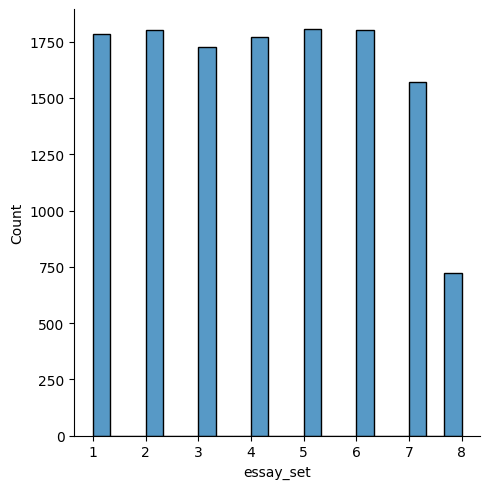

In [501]:
sns.displot(data=df_balanced,x="essay_set")  

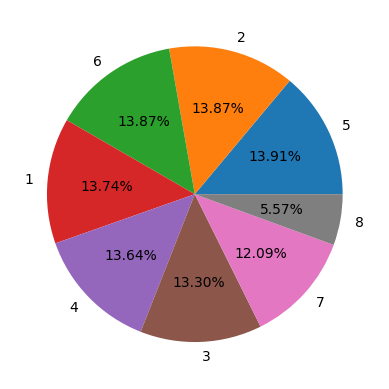

In [502]:
plt.pie(df_balanced.essay_set.value_counts(),labels=df_balanced.essay_set.value_counts().index,autopct='%1.2f%%')
plt.show()

In [503]:
df_balanced.groupby(["essay_set","Score"]).essay_set.count()

essay_set  Score
1          0          45
           1        1266
           2         472
2          0         135
           1         991
           2         674
3          0         646
           1         657
           2         423
4          0         947
           1         570
           2         253
5          0         326
           1        1221
           2         258
6          0         211
           1        1222
           2         367
7          0         354
           1        1066
           2         149
8          0          17
           1         665
           2          41
Name: essay_set, dtype: int64

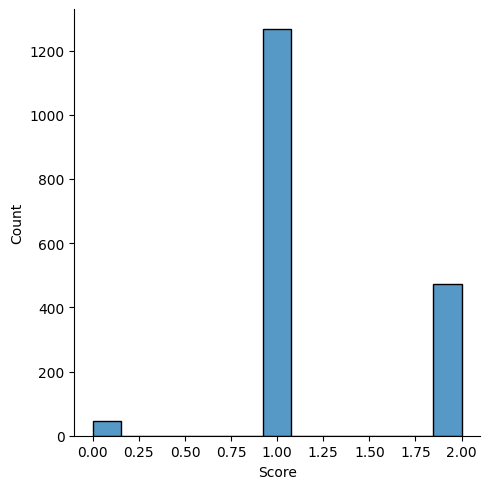

In [504]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 1].Score)

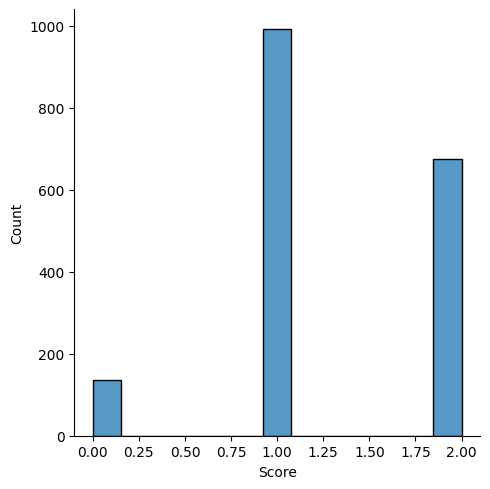

In [505]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 2].Score)

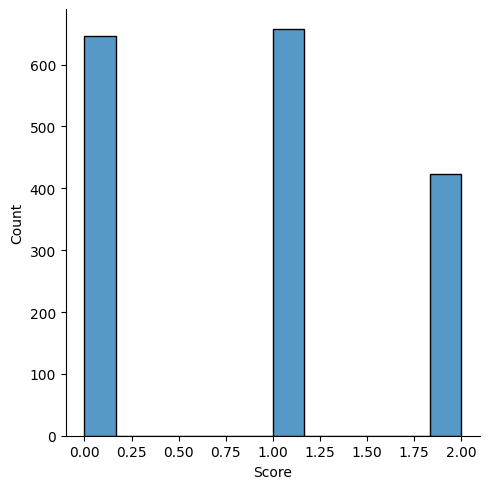

In [506]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 3].Score)

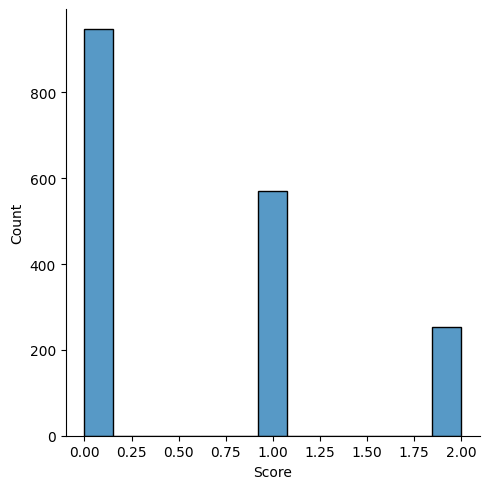

In [507]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 4].Score)

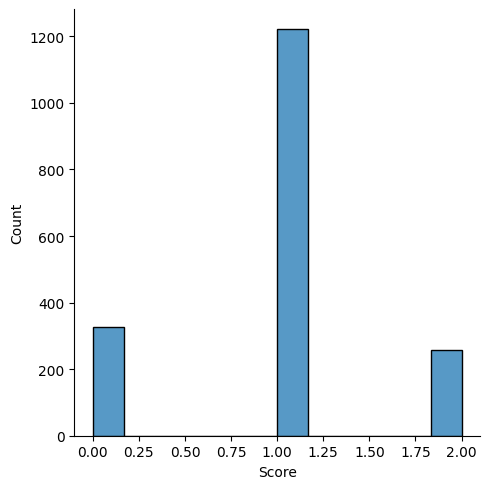

In [508]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 5].Score)

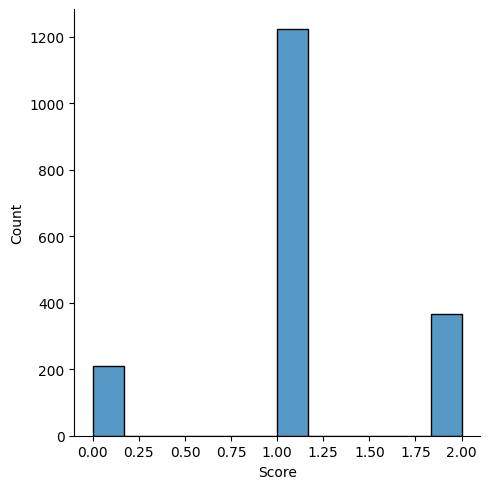

In [509]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 6].Score)

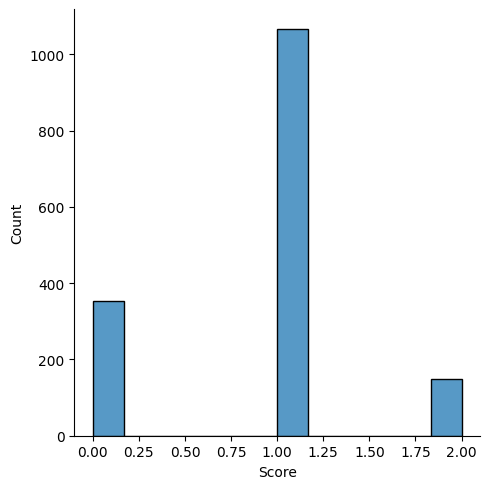

In [510]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 7].Score)

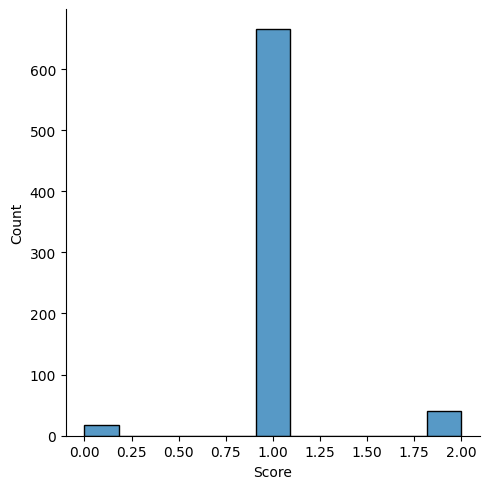

In [511]:
sns.displot(df_balanced.loc[df_balanced['essay_set'] == 8].Score)

In [512]:
df_balanced.groupby(["Score"]).essay_set.count()

Score
0    2681
1    7658
2    2637
Name: essay_set, dtype: int64

<Axes: ylabel='essay_set'>

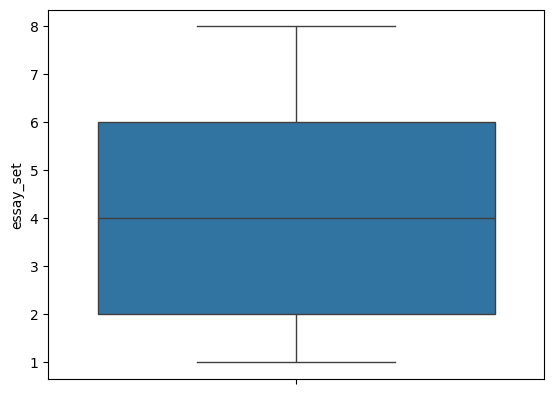

In [516]:
sns.boxplot(df_balanced.essay_set)

Analyzing the graphics, we realized that our database has different number of essay sets id. We also see that each set of essays has an unbalanced number of scores. Because of this our model may lack the information to study. In the next step, we test and train our model, try to balance it and give models the best data to study

In order to start learning the model, we need to divide the data into training and testing. We will also use verification data as our database is not balanced. We will balance the database after separation.  
Verification data we will use to find the best simulation for training.

We’re going to split data randomly, in a ratio of 0.16. First we will distribute the data to training and testing sets, and after  we will divide the training data into training and verification data in a ratio of 0.2

We chose to divide it so that the number of verification and testing sets is about the same, and the amount of training data is much larger.

## Training without balancing

Functions shown below are responsible for data separation into training and testing (or validation, depend on the input data) and data storage by different models

The split function gets at the input to the database that will be divided. Output the function returns split data

Logic, Forest, brch, Classifier and Tree functions receives separated data at the input and passes it through the model (LogisticRegression, RandomForestClassifier, Birch, MLPClassifier or DecisionTreeClassifier) that learns from it. This is followed by verification based on the verification data. Also in the function the accuracy of the model is calculated. At the end of the function give a percentage of accuracy rounded to a thousandth.

In addition, in this part we will try to teach the model without balancing to see the percentage of accuracy and see if balancing helped improve the accuracy.  

We will add each result to the "final_results" table to compare them at the end

In [743]:
final_results = pd.DataFrame(
    columns=["Logic", "Forest", 'Birch', "Classifier", "Tree"],index=["without_balancing","only_essay_sets", 'only_score', "oversampling", "undersampling"]
)

In [533]:
def split(df_train, df_test):
    x_train = df_train.drop(columns="Score").values
    y_train = df_train.loc[:,"Score"].values
    x_test = df_test.drop(columns="Score").values
    y_test = df_test.loc[:,"Score"].values
    return x_train, y_train, x_test, y_test

In [746]:
def Logic(x_train, y_train, x_test, y_test):
    # here we initialize the model
    lr_model = LogisticRegression(random_state=0,max_iter=20000)

    # here we train the model on the training data
    lr_model.fit(X=x_train, y=y_train)
    y_test_predicted = lr_model.predict(x_test)
    y_test = y_test.astype(int)
    print(y_test_predicted)
    print(y_test)
    report_lr = classification_report(y_true=y_test, y_pred=y_test_predicted)
    print(report_lr)
    percent = (y_test_predicted == y_test).sum()/len(y_test)
    return round(percent,3)
    
def Forest(x_train, y_train, x_test, y_test):
    rf_model = RandomForestClassifier(n_estimators = 60, max_depth = 16)
    rf_model.fit(X=x_train,y=y_train)
    y_test_predicted = rf_model.predict(x_test)
    y_test = y_test.astype(int)
    print(y_test_predicted)
    print(y_test)
    report_rf = classification_report(y_true=y_test, y_pred=y_test_predicted)
    print(report_rf)
    percent = (y_test_predicted == y_test).sum()/len(y_test)
    return round(percent,3)

def brch(x_train, y_train, x_test, y_test):
    br_model = Birch(branching_factor=30, n_clusters=5, threshold=2.5)
    br_model.fit(X=x_train,y=y_train)
    y_test_predicted = br_model.predict(x_test)
    y_test = y_test.astype(int)
    print(y_test_predicted)
    print(y_test)
    report_br = classification_report(y_true=y_test, y_pred=y_test_predicted, zero_division=1)
    print(report_br)
    percent = (y_test_predicted == y_test).sum()/len(y_test)
    return round(percent,3)

def Classifier(x_train, y_train, x_test, y_test):
    c_model = MLPClassifier(hidden_layer_sizes=(20,10),max_iter=1000)
    c_model.fit(X=x_train,y=y_train)
    y_test_predicted = c_model.predict(x_test)
    y_test = y_test.astype(int)
    print(y_test_predicted)
    print(y_test)
    report_br = classification_report(y_true=y_test, y_pred=y_test_predicted)
    print(report_br)
    percent = (y_test_predicted == y_test).sum()/len(y_test)
    return round(percent,3)

def Tree(x_train, y_train, x_test, y_test):
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X=x_train,y=y_train)
    y_test_predicted = dt_model.predict(x_test)
    y_test = y_test.astype(int)
    print(y_test_predicted)
    print(y_test)
    report_br = classification_report(y_true=y_test, y_pred=y_test_predicted)
    print(report_br)
    percent = (y_test_predicted == y_test).sum()/len(y_test)
    return round(percent,3)

**Number of columns and rows before separation:**

In [536]:
df_balanced.groupby(["essay_set"]).essay_set.count()

essay_set
1    1783
2    1800
3    1726
4    1770
5    1805
6    1800
7    1569
8     723
Name: essay_set, dtype: int64

In [601]:
df_balanced.groupby(["essay_set","Score"]).essay_set.count()

essay_set  Score
1          0          45
           1        1266
           2         472
2          0         135
           1         991
           2         674
3          0         646
           1         657
           2         423
4          0         947
           1         570
           2         253
5          0         326
           1        1221
           2         258
6          0         211
           1        1222
           2         367
7          0         354
           1        1066
           2         149
8          0          17
           1         665
           2          41
Name: essay_set, dtype: int64

**Division into training and testing sets:**

In [757]:
df_train, df_test = train_test_split(df_balanced,test_size = 0.16)
df_train, df_val = train_test_split(df_train,test_size = 0.2)
df_train.shape, df_val.shape, df_test.shape

((8719, 21), (2180, 21), (2077, 21))

**Number of columns and rows after separation:**

In [605]:
df_train.groupby(["essay_set"]).essay_set.count()

essay_set
1    1189
2    1194
3    1159
4    1171
5    1230
6    1230
7    1045
8     501
Name: essay_set, dtype: int64

In [606]:
df_train.groupby(["essay_set","Score"]).essay_set.count()

essay_set  Score
1          0         30
           1        850
           2        309
2          0         89
           1        646
           2        459
3          0        429
           1        458
           2        272
4          0        635
           1        372
           2        164
5          0        228
           1        821
           2        181
6          0        148
           1        828
           2        254
7          0        236
           1        715
           2         94
8          0         14
           1        460
           2         27
Name: essay_set, dtype: int64

**Division into training and validation sets:**

In [758]:
x_train, y_train, x_val, y_val = split(df_train, df_val)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((8719, 20), (8719,), (2180, 20), (2180,))

**Training from different models**

In [759]:
final_results.iloc[0,0] = Logic(x_train, y_train, x_val, y_val)

[1 1 1 ... 0 1 0]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       444
           1       0.72      0.87      0.79      1290
           2       0.63      0.28      0.38       446

    accuracy                           0.72      2180
   macro avg       0.70      0.62      0.63      2180
weighted avg       0.71      0.72      0.69      2180



D:\Anaconda\envs\dsti\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [760]:
final_results.iloc[0,1] = Forest(x_train, y_train, x_val, y_val)

[1 1 1 ... 1 2 0]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       444
           1       0.76      0.86      0.81      1290
           2       0.69      0.53      0.60       446

    accuracy                           0.76      2180
   macro avg       0.75      0.69      0.71      2180
weighted avg       0.75      0.76      0.75      2180



In [761]:
final_results.iloc[0,2] = brch(x_train, y_train, x_val, y_val)

[4 4 2 ... 4 4 4]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.00      0.00      1.00       444
           1       1.00      0.00      0.00      1290
           2       0.41      0.47      0.43       446
           4       0.00      1.00      0.00         0

    accuracy                           0.10      2180
   macro avg       0.35      0.37      0.36      2180
weighted avg       0.67      0.10      0.29      2180



In [762]:
final_results.iloc[0,3] = Classifier(x_train, y_train, x_val, y_val)

[1 1 1 ... 1 1 1]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.75      0.66      0.71       444
           1       0.72      0.72      0.72      1290
           2       0.45      0.52      0.48       446

    accuracy                           0.66      2180
   macro avg       0.64      0.63      0.64      2180
weighted avg       0.67      0.66      0.67      2180



In [763]:
final_results.iloc[0,4] = Tree(x_train, y_train, x_val, y_val)

[1 2 1 ... 0 2 0]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       444
           1       0.75      0.74      0.75      1290
           2       0.56      0.58      0.57       446

    accuracy                           0.69      2180
   macro avg       0.66      0.66      0.66      2180
weighted avg       0.69      0.69      0.69      2180



In [764]:
final_results

,Logic,Forest,Birch,Classifier,Tree
without_balancing,0.716,0.755,0.097,0.664,0.693
only_essay_sets,NaN,NaN,NaN,NaN,NaN
only_score,NaN,NaN,NaN,NaN,NaN
oversampling,NaN,NaN,NaN,NaN,NaN
undersampling,NaN,NaN,NaN,NaN,NaN


## Traning only with balancing essay sets

In this article we will try to balance only essey set id using SMOTE method.  
The function below will run the database through the method. On the input we give the function of the database itself and the name of the column for which additions will be made. The output function will display a new database with new lines

In [615]:
def smt(df, y_column):
    x = df.values
    y = [0]*len(df)
    y = df.loc[:, y_column].values
    counter = Counter(y)
    print(counter)
    oversample = SMOTE()
    x, y = oversample.fit_resample(x, y)
    counter = Counter(y)
    print(counter)
    x = pd.DataFrame(x, columns=['essay_set', 'Score', 'word_count', 'unique_word_count', 'total_adjectives', 
                                 'at_mentions_count', 'flesch_reading_ease', 'smog_index', 'FK', 'DCR', 'CLI', 
                                 'lexical_diversity', 'MTLD', 'Words_AV', 'Sentence_AV', 'Clause_AV', 'root_nodes_count', 
                                 'syntactic_complexity', 'Misspells_count', 'overusage_punctuation', 'score_sentiment'])
    return x

**Number of essay sets before balancing**

In [616]:
df_train.groupby(["essay_set"]).essay_set.count()

essay_set
1    1189
2    1194
3    1159
4    1171
5    1230
6    1230
7    1045
8     501
Name: essay_set, dtype: int64

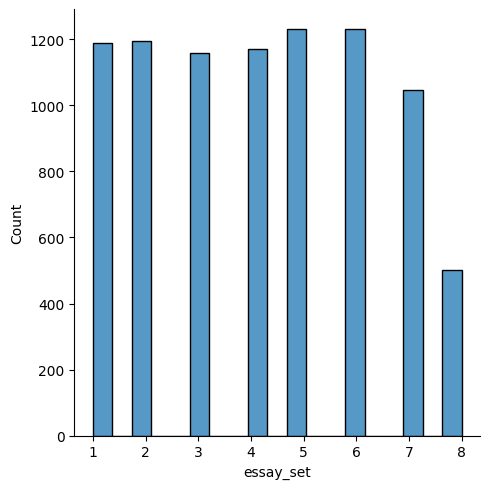

In [617]:
sns.displot(data=df_train,x="essay_set")  

In [618]:
df_final_with_bal_sets = smt(df_train.loc[(df_balanced['essay_set'] == 7) | (df_balanced['essay_set'] == 8)], 'essay_set')
df_final_with_bal_sets

Counter({7: 1045, 8: 501})
Counter({8: 1045, 7: 1045})


,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,8.0,1.0,845.000000,294.000000,44.000000,16.000000,83.390000,8.000000,8.042127,6.781201,...,0.436686,56.976845,4.043787,18.790698,8.600000,49.000000,25.270270,67.000000,2577.000000,0.187652
1,7.0,1.0,58.000000,42.000000,4.000000,0.000000,68.810000,10.500000,8.333333,6.997000,...,0.741379,46.368984,4.655172,29.000000,2.000000,3.000000,22.666667,7.000000,38.000000,0.055324
2,8.0,1.0,695.000000,208.000000,29.000000,145.000000,76.420000,5.700000,2.930664,10.401564,...,0.466187,73.663893,4.814388,12.607143,8.000000,72.000000,14.486111,132.000000,29996.000000,0.090055
3,7.0,1.0,236.000000,109.000000,8.000000,16.000000,78.820000,8.500000,10.756667,7.361417,...,0.525424,50.543817,4.233051,22.700000,5.000000,8.000000,33.250000,22.000000,362.000000,0.356250
4,7.0,1.0,104.000000,54.000000,3.000000,6.000000,84.200000,5.700000,6.984739,8.862935,...,0.596154,33.308255,3.894231,13.857143,7.000000,7.000000,23.000000,13.000000,72.000000,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,8.0,1.0,513.986044,194.984881,34.663953,37.337210,79.543861,6.932791,7.706017,8.156891,...,0.466710,57.637553,4.246940,16.259540,14.174711,30.996511,26.812511,54.329069,3251.319765,0.148856
2086,8.0,1.0,480.757950,182.110023,41.382396,6.382396,83.966244,8.019120,5.198832,6.829784,...,0.494120,70.992091,4.374249,18.109008,6.032213,37.786797,14.879961,57.764793,1640.911982,0.299772
2087,8.0,1.0,839.844492,307.153544,53.537404,16.385824,86.142001,7.861221,7.913927,6.560018,...,0.425970,57.309437,4.019845,17.581641,45.965541,47.923228,23.917163,69.153544,2817.088554,0.017056
2088,8.0,1.0,601.316633,249.000000,48.265611,1.000000,78.431214,8.783201,7.334777,6.352759,...,0.483935,71.740510,4.265527,18.963130,6.468779,33.734389,20.332351,50.398416,1274.628845,0.178203


In [619]:
df_final_with_bal_sets =  pd.concat([df_final_with_bal_sets, df_train.loc[df_train['essay_set']<7]]).drop_duplicates().reset_index(drop=True)
df_final_with_bal_sets['essay_set'] = df_final_with_bal_sets['essay_set'].astype(int)
df_final_with_bal_sets['Score'] = df_final_with_bal_sets['Score'].astype(int)
df_final_with_bal_sets

,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,8,1,845.0,294.0,44.0,16.0,83.39,8.0,8.042127,6.781201,...,0.436686,56.976845,4.043787,18.790698,8.600000,49.0,25.270270,67.0,2577.0,0.187652
1,7,1,58.0,42.0,4.0,0.0,68.81,10.5,8.333333,6.997000,...,0.741379,46.368984,4.655172,29.000000,2.000000,3.0,22.666667,7.0,38.0,0.055324
2,8,1,695.0,208.0,29.0,145.0,76.42,5.7,2.930664,10.401564,...,0.466187,73.663893,4.814388,12.607143,8.000000,72.0,14.486111,132.0,29996.0,0.090055
3,7,1,236.0,109.0,8.0,16.0,78.82,8.5,10.756667,7.361417,...,0.525424,50.543817,4.233051,22.700000,5.000000,8.0,33.250000,22.0,362.0,0.356250
4,7,1,104.0,54.0,3.0,6.0,84.20,5.7,6.984739,8.862935,...,0.596154,33.308255,3.894231,13.857143,7.000000,7.0,23.000000,13.0,72.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9257,2,2,300.0,136.0,22.0,2.0,76.66,9.2,8.086339,6.684759,...,0.510000,66.555517,4.343333,18.312500,2.666667,16.0,21.733333,27.0,281.0,0.060302
9258,4,0,24.0,21.0,1.0,0.0,101.60,0.0,2.736667,1.253117,...,0.916667,53.760000,4.125000,11.333333,0.272727,2.0,13.000000,3.0,4.0,0.200000
9259,6,2,235.0,124.0,16.0,2.0,58.55,12.2,13.096755,7.713968,...,0.582979,67.436448,4.757447,25.111111,9.000000,8.0,31.375000,17.0,86.0,0.152683
9260,4,0,53.0,39.0,1.0,0.0,91.82,6.0,4.009545,6.041045,...,0.792453,54.590000,4.169811,9.600000,5.000000,4.0,14.250000,6.0,16.0,0.250000


**Number of essay sets after balancing**

In [620]:
df_final_with_bal_sets.groupby(["essay_set"]).essay_set.count()

essay_set
1    1189
2    1194
3    1159
4    1170
5    1230
6    1230
7    1045
8    1045
Name: essay_set, dtype: int64

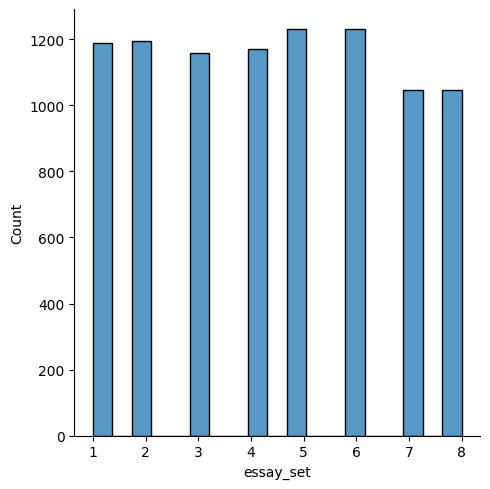

In [621]:
sns.displot(data=df_final_with_bal_sets,x="essay_set")  

**Division balanced data into training and testing sets:**

In [765]:
x_train, y_train, x_val, y_val = split(df_final_with_bal_sets, df_val)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((9262, 20), (9262,), (2180, 20), (2180,))

**Training balanced data from different models**

In [766]:
final_results.iloc[1,0] = Logic(x_train, y_train, x_val, y_val)

[1 1 1 ... 0 1 0]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       444
           1       0.71      0.89      0.79      1290
           2       0.64      0.24      0.35       446

    accuracy                           0.71      2180
   macro avg       0.70      0.60      0.62      2180
weighted avg       0.71      0.71      0.68      2180



D:\Anaconda\envs\dsti\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [767]:
final_results.iloc[1,1] = Forest(x_train, y_train, x_val, y_val)

[0 1 1 ... 1 2 1]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       444
           1       0.91      0.96      0.93      1290
           2       0.91      0.86      0.88       446

    accuracy                           0.92      2180
   macro avg       0.92      0.90      0.91      2180
weighted avg       0.92      0.92      0.92      2180



In [768]:
final_results.iloc[1,2] = brch(x_train, y_train, x_val, y_val)

[3 3 0 ... 3 3 3]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       444
           1       0.94      0.01      0.02      1290
           2       0.38      0.06      0.10       446
           3       0.00      1.00      0.00         0

    accuracy                           0.02      2180
   macro avg       0.33      0.27      0.03      2180
weighted avg       0.63      0.02      0.04      2180



In [769]:
final_results.iloc[1,3] = Classifier(x_train, y_train, x_val, y_val)

[1 1 1 ... 1 1 0]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       444
           1       0.70      0.90      0.79      1290
           2       0.62      0.17      0.26       446

    accuracy                           0.71      2180
   macro avg       0.70      0.58      0.59      2180
weighted avg       0.70      0.71      0.67      2180



In [770]:
final_results.iloc[1,4] = Tree(x_train, y_train, x_val, y_val)

[0 0 1 ... 1 2 1]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       444
           1       0.92      0.92      0.92      1290
           2       0.85      0.88      0.86       446

    accuracy                           0.90      2180
   macro avg       0.89      0.89      0.89      2180
weighted avg       0.90      0.90      0.90      2180



In [771]:
final_results

,Logic,Forest,Birch,Classifier,Tree
without_balancing,0.716,0.755,0.097,0.664,0.693
only_essay_sets,0.712,0.918,0.021,0.707,0.9
only_score,NaN,NaN,NaN,NaN,NaN
oversampling,NaN,NaN,NaN,NaN,NaN
undersampling,NaN,NaN,NaN,NaN,NaN


After the actions we have taken, we can see that the result has not changed. Keep balancing the data, maybe this will affect the result in the future

## Training with balanced domain score

In this article we will try to balance only domain scores using SMOTE method.  

We will balance by each essay set separately

**Number of scores before balancing**

In [630]:
df_train.groupby(["essay_set","Score"]).essay_set.count()

essay_set  Score
1          0         30
           1        850
           2        309
2          0         89
           1        646
           2        459
3          0        429
           1        458
           2        272
4          0        635
           1        372
           2        164
5          0        228
           1        821
           2        181
6          0        148
           1        828
           2        254
7          0        236
           1        715
           2         94
8          0         14
           1        460
           2         27
Name: essay_set, dtype: int64

### Essay set 1

In [631]:
df_smote =  df_train.loc[df_train['essay_set'] == 1]
df_final_bal_score = smt(df_smote, 'Score')
df_final_bal_score

Counter({1: 850, 2: 309, 0: 30})
Counter({1: 850, 0: 850, 2: 850})


,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,1.0,1.0,488.000000,214.000000,33.000000,16.000000,86.100000,7.700000,4.520731,6.714710,...,0.549180,64.263169,4.434426,9.608696,46.000000,47.000000,12.239130,89.000000,2451.000000,0.187000
1,1.0,1.0,223.000000,98.000000,10.000000,4.000000,77.980000,8.800000,6.538327,6.682353,...,0.533632,41.414286,4.210762,14.928571,14.000000,13.000000,19.076923,20.000000,205.000000,0.209455
2,1.0,1.0,463.000000,207.000000,31.000000,39.000000,62.580000,11.000000,9.151623,8.262631,...,0.546436,83.696640,5.000000,16.807692,26.000000,27.000000,20.666667,66.000000,2584.000000,0.311371
3,1.0,1.0,353.000000,116.000000,12.000000,0.000000,66.070000,11.900000,9.817500,7.767007,...,0.376771,38.964162,4.515581,19.764706,17.000000,16.000000,23.750000,25.000000,375.000000,0.181410
4,1.0,1.0,200.000000,101.000000,12.000000,0.000000,79.940000,8.500000,8.247000,6.218650,...,0.585000,42.832732,3.950000,21.222222,9.000000,8.000000,27.250000,15.000000,132.000000,0.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,1.0,2.0,471.292532,222.434026,33.070747,27.528355,69.977541,9.414149,8.152740,7.989673,...,0.584241,89.266143,4.655791,18.619817,24.023582,27.000000,20.756641,67.000000,1472.542392,0.124002
2546,1.0,2.0,598.660259,229.923562,42.000000,12.445863,69.674631,9.936942,6.730609,7.583854,...,0.502213,69.633289,4.766405,13.943612,42.477699,48.738850,14.529316,82.076438,3062.617810,0.176303
2547,1.0,2.0,461.433845,219.483158,43.883320,18.483158,67.153975,11.171652,7.920735,8.678052,...,0.588440,73.599111,4.978691,12.869234,33.583401,34.166801,16.017296,68.066559,1914.033684,0.004769
2548,1.0,2.0,508.577041,208.904422,49.235374,33.566327,60.908449,11.890085,9.713610,9.122366,...,0.501578,77.507396,4.857498,17.429471,27.955782,26.907993,22.477101,78.187585,2205.000000,0.247605


In [632]:
df_final_bal_score.groupby(["essay_set","Score"]).essay_set.count()

essay_set  Score
1.0        0.0      850
           1.0      850
           2.0      850
Name: essay_set, dtype: int64

### Essay set 2

In [633]:
df_smote =  df_train.loc[((df_train['essay_set'] == 2) & ((df_train['Score'] == 0) | (df_train['Score'] == 2)))]
df_final_bal_score = pd.concat([df_final_bal_score, smt(df_smote, 'Score')]).drop_duplicates().reset_index(drop=True)
df_final_bal_score

Counter({2: 459, 0: 89})
Counter({2: 459, 0: 459})


,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,1.0,1.0,488.000000,214.000000,33.000000,16.000000,86.100000,7.700000,4.520731,6.714710,...,0.549180,64.263169,4.434426,9.608696,46.000000,47.000000,12.239130,89.000000,2451.000000,0.187000
1,1.0,1.0,223.000000,98.000000,10.000000,4.000000,77.980000,8.800000,6.538327,6.682353,...,0.533632,41.414286,4.210762,14.928571,14.000000,13.000000,19.076923,20.000000,205.000000,0.209455
2,1.0,1.0,463.000000,207.000000,31.000000,39.000000,62.580000,11.000000,9.151623,8.262631,...,0.546436,83.696640,5.000000,16.807692,26.000000,27.000000,20.666667,66.000000,2584.000000,0.311371
3,1.0,1.0,353.000000,116.000000,12.000000,0.000000,66.070000,11.900000,9.817500,7.767007,...,0.376771,38.964162,4.515581,19.764706,17.000000,16.000000,23.750000,25.000000,375.000000,0.181410
4,1.0,1.0,200.000000,101.000000,12.000000,0.000000,79.940000,8.500000,8.247000,6.218650,...,0.585000,42.832732,3.950000,21.222222,9.000000,8.000000,27.250000,15.000000,132.000000,0.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,2.0,0.0,92.521068,49.937601,7.875201,0.354133,78.964615,8.897974,9.442868,6.618324,...,0.591232,38.126215,4.131948,14.216407,3.447732,6.354133,27.199421,7.416533,32.436796,-0.120640
3464,2.0,0.0,567.830698,189.276847,21.993730,5.899357,81.719375,8.300000,6.988642,6.659563,...,0.459126,52.376150,4.217064,18.555308,2.123165,29.993730,21.939372,56.364791,1460.189535,0.011296
3465,2.0,0.0,109.390469,70.463490,6.073021,0.231745,70.108393,10.475557,8.888645,7.128629,...,0.690040,60.426540,4.208321,20.765719,5.231745,5.000000,22.970792,8.231745,21.622214,0.236049
3466,2.0,0.0,51.999234,31.866616,4.466462,0.000000,84.058920,0.000000,8.434459,2.722544,...,0.680347,34.344341,3.300973,28.600613,1.866616,2.733231,28.600613,2.866616,4.333078,-0.273388


In [634]:
df_final_bal_score.groupby(["essay_set","Score"]).essay_set.count()

essay_set  Score
1.0        0.0      850
           1.0      850
           2.0      850
2.0        0.0      459
           2.0      459
Name: essay_set, dtype: int64

### Essay set 3

In [635]:
df_smote =  df_train.loc[((df_train['essay_set'] == 3) & ((df_train['Score'] == 0) | (df_train['Score'] == 2)))]
df_final_bal_score = pd.concat([df_final_bal_score, smt(df_smote, 'Score')]).drop_duplicates().reset_index(drop=True)
df_final_bal_score

Counter({0: 429, 2: 272})
Counter({0: 429, 2: 429})


,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,1.0,1.0,488.000000,214.000000,33.000000,16.000000,86.100000,7.700000,4.520731,6.714710,...,0.549180,64.263169,4.434426,9.608696,46.000000,47.000000,12.239130,89.000000,2451.000000,0.187000
1,1.0,1.0,223.000000,98.000000,10.000000,4.000000,77.980000,8.800000,6.538327,6.682353,...,0.533632,41.414286,4.210762,14.928571,14.000000,13.000000,19.076923,20.000000,205.000000,0.209455
2,1.0,1.0,463.000000,207.000000,31.000000,39.000000,62.580000,11.000000,9.151623,8.262631,...,0.546436,83.696640,5.000000,16.807692,26.000000,27.000000,20.666667,66.000000,2584.000000,0.311371
3,1.0,1.0,353.000000,116.000000,12.000000,0.000000,66.070000,11.900000,9.817500,7.767007,...,0.376771,38.964162,4.515581,19.764706,17.000000,16.000000,23.750000,25.000000,375.000000,0.181410
4,1.0,1.0,200.000000,101.000000,12.000000,0.000000,79.940000,8.500000,8.247000,6.218650,...,0.585000,42.832732,3.950000,21.222222,9.000000,8.000000,27.250000,15.000000,132.000000,0.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,3.0,2.0,110.370969,66.258063,2.314516,0.000000,62.306770,10.232662,13.416538,6.657018,...,0.711243,46.482804,3.923583,25.751413,4.157258,7.685484,36.949935,5.471774,10.943547,-0.000005
4322,3.0,2.0,211.016786,119.813503,16.762774,3.271168,71.943588,9.588139,8.004603,7.594904,...,0.656088,69.612921,4.603118,14.049953,14.152555,12.728832,19.837285,34.542335,333.813503,0.026245
4323,3.0,2.0,143.664229,87.427527,9.954122,1.618351,74.883597,9.195412,7.008355,7.425568,...,0.703343,70.160790,4.662749,11.601740,11.618351,10.809176,15.687734,19.572473,153.099069,-0.041077
4324,3.0,2.0,155.841540,96.630260,10.841540,3.000000,73.766384,8.405640,10.505908,8.871096,...,0.729109,98.447772,4.810113,12.165659,11.788720,8.894360,25.037729,28.000000,212.373320,0.208012


In [636]:
df_final_bal_score.groupby(["essay_set","Score"]).essay_set.count()

essay_set  Score
1.0        0.0      850
           1.0      850
           2.0      850
2.0        0.0      459
           2.0      459
3.0        0.0      429
           2.0      429
Name: essay_set, dtype: int64

### Essay set 4

In [637]:
df_smote =  df_train.loc[df_train['essay_set'] == 4]
df_final_bal_score = pd.concat([df_final_bal_score, smt(df_smote, 'Score')]).drop_duplicates().reset_index(drop=True)
df_final_bal_score

Counter({0: 635, 1: 372, 2: 164})
Counter({0: 635, 1: 635, 2: 635})


,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,1.0,1.0,488.000000,214.000000,33.000000,16.000000,86.100000,7.700000,4.520731,6.714710,...,0.549180,64.263169,4.434426,9.608696,46.000000,47.000000,12.239130,89.000000,2451.000000,0.187000
1,1.0,1.0,223.000000,98.000000,10.000000,4.000000,77.980000,8.800000,6.538327,6.682353,...,0.533632,41.414286,4.210762,14.928571,14.000000,13.000000,19.076923,20.000000,205.000000,0.209455
2,1.0,1.0,463.000000,207.000000,31.000000,39.000000,62.580000,11.000000,9.151623,8.262631,...,0.546436,83.696640,5.000000,16.807692,26.000000,27.000000,20.666667,66.000000,2584.000000,0.311371
3,1.0,1.0,353.000000,116.000000,12.000000,0.000000,66.070000,11.900000,9.817500,7.767007,...,0.376771,38.964162,4.515581,19.764706,17.000000,16.000000,23.750000,25.000000,375.000000,0.181410
4,1.0,1.0,200.000000,101.000000,12.000000,0.000000,79.940000,8.500000,8.247000,6.218650,...,0.585000,42.832732,3.950000,21.222222,9.000000,8.000000,27.250000,15.000000,132.000000,0.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6225,4.0,2.0,163.800970,87.473909,12.725121,0.725121,63.847197,10.839806,12.754963,8.119881,...,0.630820,56.674937,4.464790,25.658778,5.312803,7.000000,35.472693,23.549758,208.796121,0.133611
6226,4.0,2.0,167.207353,89.207353,10.000000,1.287255,80.754598,9.314902,9.206248,7.387475,...,0.619939,54.505631,4.458535,18.523212,9.069118,8.069118,25.972991,18.861765,116.643627,0.084725
6227,4.0,2.0,231.980922,114.258137,17.935466,0.012907,73.502127,10.094837,12.430638,8.658103,...,0.609280,59.364671,4.680200,23.835143,1.461761,8.038721,31.645328,35.909652,277.309765,0.167065
6228,4.0,2.0,204.356680,91.464981,12.821660,1.671336,64.508267,10.686368,15.033030,8.176336,...,0.539567,44.039398,4.402691,25.926029,6.917834,6.150324,43.232500,28.000000,323.741375,0.099385


In [638]:
df_final_bal_score.groupby(["essay_set","Score"]).essay_set.count()

essay_set  Score
1.0        0.0      850
           1.0      850
           2.0      850
2.0        0.0      459
           2.0      459
3.0        0.0      429
           2.0      429
4.0        0.0      634
           1.0      635
           2.0      635
Name: essay_set, dtype: int64

### Essay set 5

In [639]:
df_smote = df_train.loc[df_train['essay_set'] == 5]
df_final_bal_score = pd.concat([df_final_bal_score, smt(df_smote, 'Score')]).drop_duplicates().reset_index(drop=True)
df_final_bal_score

Counter({1: 821, 0: 228, 2: 181})
Counter({0: 821, 1: 821, 2: 821})


,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,1.0,1.0,488.000000,214.000000,33.000000,16.000000,86.100000,7.700000,4.520731,6.714710,...,0.549180,64.263169,4.434426,9.608696,46.000000,47.000000,12.239130,89.000000,2451.000000,0.187000
1,1.0,1.0,223.000000,98.000000,10.000000,4.000000,77.980000,8.800000,6.538327,6.682353,...,0.533632,41.414286,4.210762,14.928571,14.000000,13.000000,19.076923,20.000000,205.000000,0.209455
2,1.0,1.0,463.000000,207.000000,31.000000,39.000000,62.580000,11.000000,9.151623,8.262631,...,0.546436,83.696640,5.000000,16.807692,26.000000,27.000000,20.666667,66.000000,2584.000000,0.311371
3,1.0,1.0,353.000000,116.000000,12.000000,0.000000,66.070000,11.900000,9.817500,7.767007,...,0.376771,38.964162,4.515581,19.764706,17.000000,16.000000,23.750000,25.000000,375.000000,0.181410
4,1.0,1.0,200.000000,101.000000,12.000000,0.000000,79.940000,8.500000,8.247000,6.218650,...,0.585000,42.832732,3.950000,21.222222,9.000000,8.000000,27.250000,15.000000,132.000000,0.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,5.0,2.0,219.547525,98.547525,16.556559,3.608602,70.467231,8.938236,8.725770,7.021289,...,0.523100,44.541883,4.401979,17.355770,7.669678,11.000000,22.196011,19.773762,172.278280,0.308510
8689,5.0,2.0,166.077116,97.815423,16.261693,7.261693,71.814691,10.029204,7.929316,7.594655,...,0.677409,74.158546,4.759278,13.871394,11.184577,10.184577,19.628490,23.815423,276.154233,0.316139
8690,5.0,2.0,190.672983,105.037895,20.075791,0.981052,63.443487,11.134597,11.492237,7.301035,...,0.612061,54.942750,4.729407,20.715942,8.981052,8.635087,26.735720,19.000000,118.251227,0.312998
8691,5.0,2.0,211.572524,122.145049,16.213738,1.641213,71.589240,10.192364,9.300535,7.631513,...,0.676487,72.466118,4.785114,13.711565,14.427476,13.000000,22.756137,31.931311,417.854951,0.346753


In [640]:
df_final_bal_score.groupby(["essay_set","Score"]).essay_set.count()

essay_set  Score
1.0        0.0      850
           1.0      850
           2.0      850
2.0        0.0      459
           2.0      459
3.0        0.0      429
           2.0      429
4.0        0.0      634
           1.0      635
           2.0      635
5.0        0.0      821
           1.0      821
           2.0      821
Name: essay_set, dtype: int64

### Essay set 6

In [641]:
df_smote =  df_train.loc[df_train['essay_set'] == 6]
df_final_bal_score = pd.concat([df_final_bal_score, smt(df_smote, 'Score')]).drop_duplicates().reset_index(drop=True)
df_final_bal_score

Counter({1: 828, 2: 254, 0: 148})
Counter({1: 828, 2: 828, 0: 828})


,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,1.0,1.0,488.000000,214.000000,33.000000,16.000000,86.100000,7.700000,4.520731,6.714710,...,0.549180,64.263169,4.434426,9.608696,46.000000,47.000000,12.239130,89.000000,2451.000000,0.187000
1,1.0,1.0,223.000000,98.000000,10.000000,4.000000,77.980000,8.800000,6.538327,6.682353,...,0.533632,41.414286,4.210762,14.928571,14.000000,13.000000,19.076923,20.000000,205.000000,0.209455
2,1.0,1.0,463.000000,207.000000,31.000000,39.000000,62.580000,11.000000,9.151623,8.262631,...,0.546436,83.696640,5.000000,16.807692,26.000000,27.000000,20.666667,66.000000,2584.000000,0.311371
3,1.0,1.0,353.000000,116.000000,12.000000,0.000000,66.070000,11.900000,9.817500,7.767007,...,0.376771,38.964162,4.515581,19.764706,17.000000,16.000000,23.750000,25.000000,375.000000,0.181410
4,1.0,1.0,200.000000,101.000000,12.000000,0.000000,79.940000,8.500000,8.247000,6.218650,...,0.585000,42.832732,3.950000,21.222222,9.000000,8.000000,27.250000,15.000000,132.000000,0.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11172,6.0,2.0,211.268886,104.081946,12.432778,0.891805,61.122868,12.135083,11.176525,9.066810,...,0.561605,54.488770,5.070007,16.841530,6.540973,10.891805,24.518694,22.108195,322.324584,0.160256
11173,6.0,2.0,256.252651,142.839736,18.959934,5.693377,65.174645,11.961325,12.060783,10.043778,...,0.649639,94.458003,5.051776,13.755570,17.326656,10.653311,29.120339,40.959934,682.086260,0.090778
11174,6.0,2.0,215.876098,117.876098,22.374216,0.125157,61.693654,12.312265,9.442385,8.245880,...,0.620110,46.827674,4.969434,16.547992,13.000000,12.000000,20.125052,23.624529,244.250314,0.029905
11175,6.0,2.0,136.502108,79.698735,15.598314,0.502108,72.213404,10.540169,8.273905,8.112789,...,0.626335,62.862945,4.661340,13.257044,9.698735,8.698735,17.587666,12.200843,97.903794,0.021768


In [642]:
df_final_bal_score.groupby(["essay_set","Score"]).essay_set.count()

essay_set  Score
1.0        0.0      850
           1.0      850
           2.0      850
2.0        0.0      459
           2.0      459
3.0        0.0      429
           2.0      429
4.0        0.0      634
           1.0      635
           2.0      635
5.0        0.0      821
           1.0      821
           2.0      821
6.0        0.0      828
           1.0      828
           2.0      828
Name: essay_set, dtype: int64

### Essay set 7

In [643]:
df_smote =  df_train.loc[df_train['essay_set'] == 7]
df_final_bal_score = pd.concat([df_final_bal_score, smt(df_smote, 'Score')]).drop_duplicates().reset_index(drop=True)
df_final_bal_score

Counter({1: 715, 0: 236, 2: 94})
Counter({1: 715, 0: 715, 2: 715})


,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,1.0,1.0,488.000000,214.000000,33.000000,16.000000,86.100000,7.700000,4.520731,6.714710,...,0.549180,64.263169,4.434426,9.608696,46.000000,47.000000,12.239130,89.000000,2451.000000,0.187000
1,1.0,1.0,223.000000,98.000000,10.000000,4.000000,77.980000,8.800000,6.538327,6.682353,...,0.533632,41.414286,4.210762,14.928571,14.000000,13.000000,19.076923,20.000000,205.000000,0.209455
2,1.0,1.0,463.000000,207.000000,31.000000,39.000000,62.580000,11.000000,9.151623,8.262631,...,0.546436,83.696640,5.000000,16.807692,26.000000,27.000000,20.666667,66.000000,2584.000000,0.311371
3,1.0,1.0,353.000000,116.000000,12.000000,0.000000,66.070000,11.900000,9.817500,7.767007,...,0.376771,38.964162,4.515581,19.764706,17.000000,16.000000,23.750000,25.000000,375.000000,0.181410
4,1.0,1.0,200.000000,101.000000,12.000000,0.000000,79.940000,8.500000,8.247000,6.218650,...,0.585000,42.832732,3.950000,21.222222,9.000000,8.000000,27.250000,15.000000,132.000000,0.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,7.0,2.0,311.521442,146.883934,12.282590,25.645082,84.500722,7.426830,5.521733,9.104340,...,0.611541,71.363541,4.061917,13.980656,10.170312,23.883934,17.376948,54.340623,1204.470984,0.108506
13318,7.0,2.0,232.386879,110.576948,16.226241,9.803189,92.754260,6.309503,2.838872,8.510352,...,0.585068,45.960054,3.923917,15.117915,12.065604,25.226241,11.255161,39.029431,754.144692,0.066030
13319,7.0,2.0,297.326008,138.581678,11.441885,28.000000,83.746960,7.467452,5.647301,9.291201,...,0.610812,70.166131,4.096468,13.214859,10.011649,22.000000,17.920888,53.697732,1205.302268,0.107803
13320,7.0,2.0,304.647658,144.951996,18.721920,22.893118,86.414926,6.111776,3.131053,8.052527,...,0.617110,72.518839,4.395371,10.493576,30.941122,35.663042,11.815422,56.278080,1949.549796,0.287194


In [644]:
df_final_bal_score.groupby(["essay_set","Score"]).essay_set.count()

essay_set  Score
1.0        0.0      850
           1.0      850
           2.0      850
2.0        0.0      459
           2.0      459
3.0        0.0      429
           2.0      429
4.0        0.0      634
           1.0      635
           2.0      635
5.0        0.0      821
           1.0      821
           2.0      821
6.0        0.0      828
           1.0      828
           2.0      828
7.0        0.0      715
           1.0      715
           2.0      715
Name: essay_set, dtype: int64

### Essay set 8

In [645]:
df_smote =  df_train.loc[df_train['essay_set'] == 8]
df_final_bal_score = pd.concat([df_final_bal_score, smt(df_smote, 'Score')]).drop_duplicates().reset_index(drop=True)
df_final_bal_score

Counter({1: 460, 2: 27, 0: 14})
Counter({1: 460, 2: 460, 0: 460})


,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,1.0,1.0,488.000000,214.000000,33.000000,16.000000,86.100000,7.700000,4.520731,6.714710,...,0.549180,64.263169,4.434426,9.608696,46.000000,47.000000,12.239130,89.000000,2451.000000,0.187000
1,1.0,1.0,223.000000,98.000000,10.000000,4.000000,77.980000,8.800000,6.538327,6.682353,...,0.533632,41.414286,4.210762,14.928571,14.000000,13.000000,19.076923,20.000000,205.000000,0.209455
2,1.0,1.0,463.000000,207.000000,31.000000,39.000000,62.580000,11.000000,9.151623,8.262631,...,0.546436,83.696640,5.000000,16.807692,26.000000,27.000000,20.666667,66.000000,2584.000000,0.311371
3,1.0,1.0,353.000000,116.000000,12.000000,0.000000,66.070000,11.900000,9.817500,7.767007,...,0.376771,38.964162,4.515581,19.764706,17.000000,16.000000,23.750000,25.000000,375.000000,0.181410
4,1.0,1.0,200.000000,101.000000,12.000000,0.000000,79.940000,8.500000,8.247000,6.218650,...,0.585000,42.832732,3.950000,21.222222,9.000000,8.000000,27.250000,15.000000,132.000000,0.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14697,8.0,2.0,642.381415,286.702592,43.368712,13.525151,76.821824,9.671089,7.623337,7.346510,...,0.516630,63.098480,4.503697,15.724113,34.392480,39.182973,19.785912,59.368712,2420.158077,0.138773
14698,8.0,2.0,640.808841,251.603531,33.766671,39.849117,82.314297,7.622808,5.110999,7.159978,...,0.498529,67.469011,4.329606,14.819812,8.499187,44.691230,17.205532,77.382460,4472.927919,0.180590
14699,8.0,2.0,814.889146,342.787111,51.409666,21.611814,71.438504,9.537207,8.956502,7.272903,...,0.499081,83.533718,4.423763,22.775128,5.894898,38.808592,24.706987,89.994630,3809.342912,0.082157
14700,8.0,2.0,794.244637,353.803085,51.256929,42.453844,72.595413,9.232924,7.466192,7.938845,...,0.529469,80.271315,4.757977,15.219860,9.538306,52.289226,18.635353,110.875392,6107.241746,0.054163


In [646]:
df_final_bal_score.groupby(["essay_set","Score"]).essay_set.count()

essay_set  Score
1.0        0.0      850
           1.0      850
           2.0      850
2.0        0.0      459
           2.0      459
3.0        0.0      429
           2.0      429
4.0        0.0      634
           1.0      635
           2.0      635
5.0        0.0      821
           1.0      821
           2.0      821
6.0        0.0      828
           1.0      828
           2.0      828
7.0        0.0      715
           1.0      715
           2.0      715
8.0        0.0      460
           1.0      460
           2.0      460
Name: essay_set, dtype: int64

In [647]:
df_final_bal_score.shape

(14702, 21)

**Number of essay sets after balancing**

In [648]:
df_final_bal_score = pd.concat([df_final_bal_score, df_train]).drop_duplicates().reset_index(drop=True)
df_final_bal_score.groupby(["essay_set","Score"]).essay_set.count()

essay_set  Score
1.0        0.0      850
           1.0      850
           2.0      850
2.0        0.0      459
           1.0      646
           2.0      459
3.0        0.0      429
           1.0      458
           2.0      429
4.0        0.0      634
           1.0      635
           2.0      635
5.0        0.0      821
           1.0      821
           2.0      821
6.0        0.0      828
           1.0      828
           2.0      828
7.0        0.0      715
           1.0      715
           2.0      715
8.0        0.0      460
           1.0      460
           2.0      460
Name: essay_set, dtype: int64

In [649]:
df_final_bal_score.shape

(15806, 21)

In [650]:
df_final_bal_score['Score'] = df_final_bal_score['Score'].astype(int)
df_final_bal_score['essay_set'] = df_final_bal_score['essay_set'].astype(int)
df_final_bal_score

,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,1,1,488.0,214.0,33.0,16.0,86.10,7.7,4.520731,6.714710,...,0.549180,64.263169,4.434426,9.608696,46.0,47.0,12.239130,89.0,2451.0,0.187000
1,1,1,223.0,98.0,10.0,4.0,77.98,8.8,6.538327,6.682353,...,0.533632,41.414286,4.210762,14.928571,14.0,13.0,19.076923,20.0,205.0,0.209455
2,1,1,463.0,207.0,31.0,39.0,62.58,11.0,9.151623,8.262631,...,0.546436,83.696640,5.000000,16.807692,26.0,27.0,20.666667,66.0,2584.0,0.311371
3,1,1,353.0,116.0,12.0,0.0,66.07,11.9,9.817500,7.767007,...,0.376771,38.964162,4.515581,19.764706,17.0,16.0,23.750000,25.0,375.0,0.181410
4,1,1,200.0,101.0,12.0,0.0,79.94,8.5,8.247000,6.218650,...,0.585000,42.832732,3.950000,21.222222,9.0,8.0,27.250000,15.0,132.0,0.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15801,2,1,275.0,130.0,17.0,0.0,79.94,8.8,8.324125,7.114308,...,0.560000,77.223939,4.170909,31.555556,1.5,13.0,25.583333,44.0,438.0,-0.057031
15802,3,1,100.0,65.0,11.0,0.0,63.06,8.8,14.369630,8.930989,...,0.750000,91.721854,4.560000,24.000000,4.0,3.0,38.000000,20.0,74.0,-0.091667
15803,2,1,440.0,184.0,33.0,13.0,76.35,10.0,8.084739,6.797900,...,0.506818,67.719035,4.259091,21.952381,1.5,21.0,23.571429,44.0,1594.0,0.065580
15804,3,1,128.0,72.0,8.0,2.0,82.44,8.2,5.729315,7.337523,...,0.679688,60.006543,4.289062,11.800000,10.0,10.0,16.888889,24.0,159.0,0.038571


In [651]:
df_final_bal_score.groupby(["essay_set"]).essay_set.count()

essay_set
1    2550
2    1564
3    1316
4    1904
5    2463
6    2484
7    2145
8    1380
Name: essay_set, dtype: int64

**Division balanced data into training and testing sets:**

In [805]:
x_train, y_train, x_val, y_val = split(df_final_bal_score, df_val)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((16350, 20), (16350,), (2180, 20), (2180,))

**Training balanced data from different models**

In [806]:
final_results.iloc[2,0] = Logic(x_train, y_train, x_val, y_val)

[0 1 1 ... 0 2 0]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.54      0.88      0.67       444
           1       0.76      0.49      0.60      1290
           2       0.45      0.63      0.52       446

    accuracy                           0.60      2180
   macro avg       0.59      0.67      0.60      2180
weighted avg       0.66      0.60      0.60      2180



D:\Anaconda\envs\dsti\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [807]:
final_results.iloc[2,1] = Forest(x_train, y_train, x_val, y_val)

[0 1 1 ... 1 2 1]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       444
           1       0.94      0.90      0.92      1290
           2       0.81      0.93      0.87       446

    accuracy                           0.91      2180
   macro avg       0.89      0.91      0.90      2180
weighted avg       0.91      0.91      0.91      2180



In [808]:
final_results.iloc[2,2] = brch(x_train, y_train, x_val, y_val)

[2 2 1 ... 2 2 2]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.00      0.00      1.00       444
           1       0.50      0.10      0.16      1290
           2       0.16      0.65      0.25       446
           4       0.00      1.00      0.00         0

    accuracy                           0.19      2180
   macro avg       0.16      0.44      0.35      2180
weighted avg       0.33      0.19      0.35      2180



In [809]:
final_results.iloc[2,3] = Classifier(x_train, y_train, x_val, y_val)

[1 1 1 ... 1 2 1]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       444
           1       0.83      0.65      0.73      1290
           2       0.53      0.87      0.66       446

    accuracy                           0.71      2180
   macro avg       0.69      0.74      0.70      2180
weighted avg       0.75      0.71      0.71      2180



In [810]:
final_results.iloc[2,4] = Tree(x_train, y_train, x_val, y_val)

[0 1 1 ... 1 2 1]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       444
           1       0.93      0.90      0.91      1290
           2       0.84      0.90      0.87       446

    accuracy                           0.90      2180
   macro avg       0.88      0.90      0.89      2180
weighted avg       0.90      0.90      0.90      2180



In [811]:
final_results

,Logic,Forest,Birch,Classifier,Tree
without_balancing,0.716,0.755,0.097,0.664,0.693
only_essay_sets,0.712,0.918,0.021,0.707,0.9
only_score,0.601,0.907,0.19,0.706,0.895
oversampling,0.712,0.918,0.021,0.688,0.894
undersampling,0.712,0.92,0.021,0.675,0.899


Analyzing the work done, we can see that the result has not changed. Keep balancing the data, maybe this will affect the result in the future

## Training with balanced domain score and balanced essay set by oversampling

In this part we will combine the past database with the updated values after SMOTE in essay set 8 (from "Traning only with balancing essay sets" part) to add values to essay set 8.  
After that we will continue to balance essay sets with the SMOTE method.

**Number of scores before balancing**

In [660]:
df_final_bal_score = pd.concat([df_final_bal_score, df_final_with_bal_sets.loc[df_final_with_bal_sets['essay_set'] == 8]]).drop_duplicates().reset_index(drop=True)

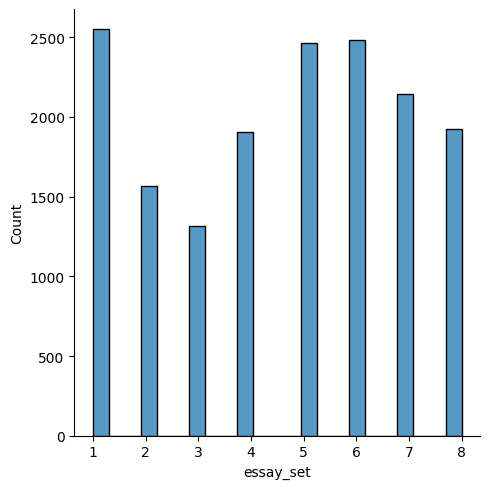

In [661]:
sns.displot(data=df_final_bal_score,x="essay_set")  

In [662]:
df_final_bal_score.groupby(["essay_set"]).essay_set.count()

essay_set
1    2550
2    1564
3    1316
4    1904
5    2463
6    2484
7    2145
8    1924
Name: essay_set, dtype: int64

In [671]:
df_smote =  df_final_bal_score.loc[(df_final_bal_score['essay_set'] == 2) | (df_final_bal_score['essay_set'] == 3) |
                                    (df_final_bal_score['essay_set'] == 4) | (df_final_bal_score['essay_set'] == 7) | 
                                    (df_final_bal_score['essay_set'] == 8)]
df_final = smt(df_smote, 'essay_set')
df_final

Counter({7: 2145, 8: 1924, 4: 1904, 2: 1564, 3: 1316})
Counter({2: 2145, 3: 2145, 4: 2145, 7: 2145, 8: 2145})


,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,2.0,2.000000,434.000000,173.000000,34.000000,6.000000,72.050000,9.700000,7.786205,7.189833,...,0.493088,50.276404,4.592166,16.346154,2.600000,27.000000,18.037037,47.000000,897.000000,0.014758
1,2.0,2.000000,487.000000,199.000000,36.000000,3.000000,68.600000,9.900000,8.420714,6.640970,...,0.478439,62.965240,4.507187,19.958333,2.666667,26.000000,21.360000,33.000000,727.000000,0.119948
2,2.0,2.000000,614.000000,233.000000,42.000000,4.000000,92.630000,6.800000,4.096818,6.586671,...,0.478827,56.737140,4.179153,14.357143,2.210526,51.000000,14.437500,78.000000,2132.000000,0.050165
3,2.0,2.000000,453.000000,168.000000,24.000000,1.000000,66.470000,11.200000,10.152947,6.602621,...,0.434879,64.714286,4.534216,23.736842,1.900000,20.000000,24.700000,44.000000,552.000000,0.145635
4,2.0,2.000000,513.000000,197.000000,40.000000,3.000000,69.820000,10.900000,9.456511,6.918159,...,0.463938,60.562500,4.717349,17.413793,2.416667,28.000000,21.333333,55.000000,1650.000000,0.090394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10720,8.0,0.000000,195.294316,84.673753,9.124112,12.787236,92.281170,5.692908,4.504981,6.932395,...,0.525681,50.022305,3.844251,11.420452,16.946809,14.159573,17.041032,25.726944,434.354566,0.323484
10721,8.0,2.000000,828.888728,365.768077,62.236091,37.237133,69.569208,10.100104,8.953181,8.408648,...,0.536995,88.843951,4.757388,18.248425,8.214593,44.235049,23.012638,122.589706,6469.729113,0.117034
10722,8.0,1.000000,325.040414,158.862522,15.000000,13.533679,78.391361,7.317789,8.291361,6.989081,...,0.550203,68.458700,4.144797,17.517645,15.109154,15.986529,24.672818,28.835579,553.617271,0.070243
10723,8.0,0.000000,205.466022,103.804194,11.636341,0.878780,98.724689,6.512324,4.220870,6.428755,...,0.556508,49.730168,3.935367,11.415795,16.602068,16.117943,15.966617,22.457662,268.725806,0.336429


In [672]:
df_final.groupby(["essay_set"]).essay_set.count()

essay_set
2.0    2145
3.0    2145
4.0    2145
7.0    2145
8.0    2145
Name: essay_set, dtype: int64

In [673]:
df_final.shape

(10725, 21)

In [674]:
df_final = pd.concat([df_final, df_final_bal_score]).drop_duplicates().reset_index(drop=True)

**Number of scores after balancing**

In [675]:
df_final.groupby(["essay_set"]).essay_set.count()

essay_set
1.0    2550
2.0    2145
3.0    2145
4.0    2145
5.0    2463
6.0    2484
7.0    2145
8.0    2145
Name: essay_set, dtype: int64

In [676]:
df_final.shape

(18222, 21)

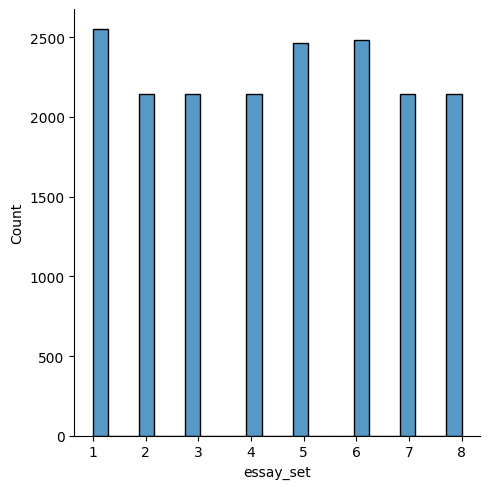

In [677]:
sns.displot(data=df_final,x="essay_set")  

In [678]:
df_final['Score'] = df_final['Score'].astype(int)
df_final['essay_set'] = df_final['essay_set'].astype(int)
df_final

,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,2,2,434.000000,173.000000,34.000000,6.000000,72.050000,9.700000,7.786205,7.189833,...,0.493088,50.276404,4.592166,16.346154,2.600000,27.000000,18.037037,47.000000,897.000000,0.014758
1,2,2,487.000000,199.000000,36.000000,3.000000,68.600000,9.900000,8.420714,6.640970,...,0.478439,62.965240,4.507187,19.958333,2.666667,26.000000,21.360000,33.000000,727.000000,0.119948
2,2,2,614.000000,233.000000,42.000000,4.000000,92.630000,6.800000,4.096818,6.586671,...,0.478827,56.737140,4.179153,14.357143,2.210526,51.000000,14.437500,78.000000,2132.000000,0.050165
3,2,2,453.000000,168.000000,24.000000,1.000000,66.470000,11.200000,10.152947,6.602621,...,0.434879,64.714286,4.534216,23.736842,1.900000,20.000000,24.700000,44.000000,552.000000,0.145635
4,2,2,513.000000,197.000000,40.000000,3.000000,69.820000,10.900000,9.456511,6.918159,...,0.463938,60.562500,4.717349,17.413793,2.416667,28.000000,21.333333,55.000000,1650.000000,0.090394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18217,6,2,211.268886,104.081946,12.432778,0.891805,61.122868,12.135083,11.176525,9.066810,...,0.561605,54.488770,5.070007,16.841530,6.540973,10.891805,24.518694,22.108195,322.324584,0.160256
18218,6,2,256.252651,142.839736,18.959934,5.693377,65.174645,11.961325,12.060783,10.043778,...,0.649639,94.458003,5.051776,13.755570,17.326656,10.653311,29.120339,40.959934,682.086260,0.090778
18219,6,2,215.876098,117.876098,22.374216,0.125157,61.693654,12.312265,9.442385,8.245880,...,0.620110,46.827674,4.969434,16.547992,13.000000,12.000000,20.125052,23.624529,244.250314,0.029905
18220,6,2,136.502108,79.698735,15.598314,0.502108,72.213404,10.540169,8.273905,8.112789,...,0.626335,62.862945,4.661340,13.257044,9.698735,8.698735,17.587666,12.200843,97.903794,0.021768


**Division balanced data into training and testing sets:**

In [812]:
x_train, y_train, x_val, y_val = split(df_final, df_val)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((18222, 20), (18222,), (2180, 20), (2180,))

**Training balanced data from different models**

In [813]:
final_results.iloc[3,0] = Logic(x_train, y_train, x_val, y_val)

[1 1 1 ... 0 2 0]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.54      0.89      0.68       444
           1       0.76      0.50      0.60      1290
           2       0.45      0.60      0.51       446

    accuracy                           0.60      2180
   macro avg       0.58      0.66      0.60      2180
weighted avg       0.65      0.60      0.60      2180



D:\Anaconda\envs\dsti\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [814]:
final_results.iloc[3,1] = Forest(x_train, y_train, x_val, y_val)

[0 1 1 ... 1 2 1]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       444
           1       0.94      0.90      0.92      1290
           2       0.81      0.91      0.86       446

    accuracy                           0.91      2180
   macro avg       0.89      0.91      0.90      2180
weighted avg       0.91      0.91      0.91      2180



In [815]:
final_results.iloc[3,2] = brch(x_train, y_train, x_val, y_val)

[3 3 1 ... 3 3 3]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.00      0.00      1.00       444
           1       0.59      0.20      0.29      1290
           2       0.08      0.00      0.00       446
           3       0.00      1.00      0.00         0

    accuracy                           0.12      2180
   macro avg       0.17      0.30      0.32      2180
weighted avg       0.36      0.12      0.38      2180



In [816]:
final_results.iloc[3,3] = Classifier(x_train, y_train, x_val, y_val)

[1 1 2 ... 0 2 0]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.63      0.82      0.71       444
           1       0.79      0.58      0.67      1290
           2       0.48      0.70      0.57       446

    accuracy                           0.65      2180
   macro avg       0.63      0.70      0.65      2180
weighted avg       0.69      0.65      0.66      2180



In [817]:
final_results.iloc[3,4] = Tree(x_train, y_train, x_val, y_val)

[0 1 1 ... 1 2 1]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       444
           1       0.94      0.91      0.93      1290
           2       0.85      0.90      0.88       446

    accuracy                           0.91      2180
   macro avg       0.89      0.91      0.90      2180
weighted avg       0.91      0.91      0.91      2180



In [818]:
final_results

,Logic,Forest,Birch,Classifier,Tree
without_balancing,0.716,0.755,0.097,0.664,0.693
only_essay_sets,0.712,0.918,0.021,0.707,0.9
only_score,0.601,0.907,0.19,0.706,0.895
oversampling,0.6,0.906,0.117,0.655,0.91
undersampling,0.712,0.92,0.021,0.675,0.899


## Training with balanced domain score and balanced essay set by undersampling

In this part we will try to balance the database by undersampling.  
This method is not very good for learning because we are losing data, but it might help us improve the accuracy.  
For undersampling we will use ClusterCentroids  
We will reduce 1, 5, 6 and 7 essay sets

**Number of scores before balancing**

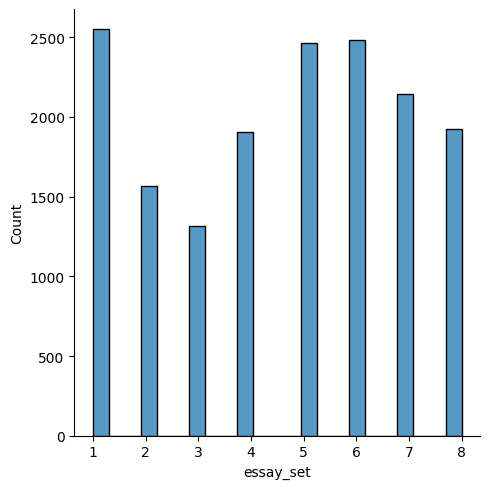

In [687]:
sns.displot(data=df_final_bal_score,x="essay_set")  

In [688]:
df_final_bal_score.groupby(["essay_set"]).essay_set.count()

essay_set
1    2550
2    1564
3    1316
4    1904
5    2463
6    2484
7    2145
8    1924
Name: essay_set, dtype: int64

In [689]:
df_final_bal_score.shape

(16350, 21)

**Undersampling the data**

In [727]:
df_cluster = df_final_bal_score.loc[((df_final_bal_score['essay_set'] == 1) | (df_final_bal_score['essay_set'] == 5) |
                                    (df_final_bal_score['essay_set'] == 6) | (df_final_bal_score['essay_set'] == 7) | 
                                     (df_final_bal_score['essay_set'] == 8))]

In [728]:
df_cluster.shape

(11566, 21)

In [729]:
# Define a custom filter to ignore the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster")

x = df_cluster.values
y = [0]*len(df_cluster)
y = df_cluster.loc[:, 'essay_set'].values
counter = Counter(y)
print(counter)
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(x, y)
counter = Counter(y_resampled)
print(counter)
print(sorted(Counter(y_resampled).items()))
df_under = pd.DataFrame(X_resampled, columns=['essay_set', 'Score', 'word_count', 'unique_word_count', 'total_adjectives', 
                                 'at_mentions_count', 'flesch_reading_ease', 'smog_index', 'FK', 'DCR', 'CLI', 
                                 'lexical_diversity', 'MTLD', 'Words_AV', 'Sentence_AV', 'Clause_AV', 'root_nodes_count', 
                                 'syntactic_complexity', 'Misspells_count', 'overusage_punctuation', 'score_sentiment'])

Counter({1: 2550, 6: 2484, 5: 2463, 7: 2145, 8: 1924})
Counter({1: 1924, 5: 1924, 6: 1924, 7: 1924, 8: 1924})
[(1, 1924), (5, 1924), (6, 1924), (7, 1924), (8, 1924)]


**Number of scores after balancing**

In [730]:
df_under = pd.concat([df_under, df_final_bal_score.loc[((df_final_bal_score['essay_set'] == 2) | (df_final_bal_score['essay_set'] == 3) |
                                    (df_final_bal_score['essay_set'] == 4))]]).drop_duplicates().reset_index(drop=True)
df_under

,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,1.0,0.0,100.474380,55.052381,5.931944,0.000000,71.013599,11.599019,8.555923,7.429892,...,0.586772,42.049114,4.101925,20.256066,5.009937,4.009937,26.900493,5.251199,16.240111,0.125732
1,1.0,2.0,504.031422,201.136161,36.994763,26.931919,59.536389,12.100000,10.084825,8.305379,...,0.519902,70.559655,4.910206,22.875978,22.036659,24.015711,23.350938,74.952867,1909.188531,0.110902
2,1.0,2.0,303.112696,145.112696,27.383420,13.962435,74.194728,9.672928,6.574464,7.447358,...,0.582050,64.786606,4.722530,14.672065,19.345855,22.037565,16.349193,44.616580,799.796637,0.226069
3,1.0,2.0,526.000000,235.000000,45.000000,37.000000,66.230000,11.000000,8.902096,9.065202,...,0.562738,89.164489,5.207224,13.216216,37.000000,35.000000,18.342857,89.000000,3887.000000,0.227487
4,1.0,2.0,437.970314,193.950524,35.006597,32.996702,73.529864,8.608246,5.911897,8.239700,...,0.568371,83.505434,4.527765,15.212934,27.016492,32.006597,17.575631,79.990105,2642.108848,0.215318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14399,2.0,1.0,275.000000,130.000000,17.000000,0.000000,79.940000,8.800000,8.324125,7.114308,...,0.560000,77.223939,4.170909,31.555556,1.500000,13.000000,25.583333,44.000000,438.000000,-0.057031
14400,3.0,1.0,100.000000,65.000000,11.000000,0.000000,63.060000,8.800000,14.369630,8.930989,...,0.750000,91.721854,4.560000,24.000000,4.000000,3.000000,38.000000,20.000000,74.000000,-0.091667
14401,2.0,1.0,440.000000,184.000000,33.000000,13.000000,76.350000,10.000000,8.084739,6.797900,...,0.506818,67.719035,4.259091,21.952381,1.500000,21.000000,23.571429,44.000000,1594.000000,0.065580
14402,3.0,1.0,128.000000,72.000000,8.000000,2.000000,82.440000,8.200000,5.729315,7.337523,...,0.679688,60.006543,4.289062,11.800000,10.000000,10.000000,16.888889,24.000000,159.000000,0.038571


In [731]:
df_under['Score'] = df_under['Score'].astype(int)
df_under['essay_set'] = df_under['essay_set'].astype(int)
df_under

,essay_set,Score,word_count,unique_word_count,total_adjectives,at_mentions_count,flesch_reading_ease,smog_index,FK,DCR,...,lexical_diversity,MTLD,Words_AV,Sentence_AV,Clause_AV,root_nodes_count,syntactic_complexity,Misspells_count,overusage_punctuation,score_sentiment
0,1,0,100.474380,55.052381,5.931944,0.000000,71.013599,11.599019,8.555923,7.429892,...,0.586772,42.049114,4.101925,20.256066,5.009937,4.009937,26.900493,5.251199,16.240111,0.125732
1,1,2,504.031422,201.136161,36.994763,26.931919,59.536389,12.100000,10.084825,8.305379,...,0.519902,70.559655,4.910206,22.875978,22.036659,24.015711,23.350938,74.952867,1909.188531,0.110902
2,1,2,303.112696,145.112696,27.383420,13.962435,74.194728,9.672928,6.574464,7.447358,...,0.582050,64.786606,4.722530,14.672065,19.345855,22.037565,16.349193,44.616580,799.796637,0.226069
3,1,2,526.000000,235.000000,45.000000,37.000000,66.230000,11.000000,8.902096,9.065202,...,0.562738,89.164489,5.207224,13.216216,37.000000,35.000000,18.342857,89.000000,3887.000000,0.227487
4,1,2,437.970314,193.950524,35.006597,32.996702,73.529864,8.608246,5.911897,8.239700,...,0.568371,83.505434,4.527765,15.212934,27.016492,32.006597,17.575631,79.990105,2642.108848,0.215318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14399,2,1,275.000000,130.000000,17.000000,0.000000,79.940000,8.800000,8.324125,7.114308,...,0.560000,77.223939,4.170909,31.555556,1.500000,13.000000,25.583333,44.000000,438.000000,-0.057031
14400,3,1,100.000000,65.000000,11.000000,0.000000,63.060000,8.800000,14.369630,8.930989,...,0.750000,91.721854,4.560000,24.000000,4.000000,3.000000,38.000000,20.000000,74.000000,-0.091667
14401,2,1,440.000000,184.000000,33.000000,13.000000,76.350000,10.000000,8.084739,6.797900,...,0.506818,67.719035,4.259091,21.952381,1.500000,21.000000,23.571429,44.000000,1594.000000,0.065580
14402,3,1,128.000000,72.000000,8.000000,2.000000,82.440000,8.200000,5.729315,7.337523,...,0.679688,60.006543,4.289062,11.800000,10.000000,10.000000,16.888889,24.000000,159.000000,0.038571


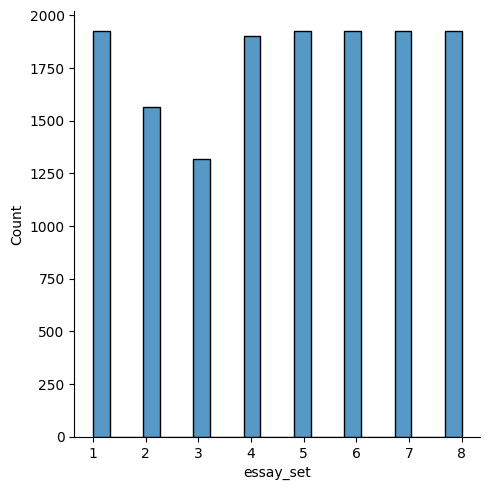

In [732]:
sns.displot(data=df_under,x="essay_set") 

In [733]:
df_under.groupby(["essay_set"]).essay_set.count()

essay_set
1    1924
2    1564
3    1316
4    1904
5    1924
6    1924
7    1924
8    1924
Name: essay_set, dtype: int64

In [734]:
df_under.shape

(14404, 21)

**Division balanced data into training and testing sets:**

In [819]:
x_train, y_train, x_val, y_val = split(df_under, df_val)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((14404, 20), (14404,), (2180, 20), (2180,))

**Training balanced data from different models**

In [820]:
final_results.iloc[4,0] = Logic(x_train, y_train, x_val, y_val)

[1 1 1 ... 0 2 0]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.61      0.84      0.71       444
           1       0.76      0.60      0.67      1290
           2       0.46      0.57      0.51       446

    accuracy                           0.64      2180
   macro avg       0.61      0.67      0.63      2180
weighted avg       0.67      0.64      0.64      2180



In [821]:
final_results.iloc[4,1] = Forest(x_train, y_train, x_val, y_val)

[0 1 1 ... 1 2 1]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       444
           1       0.93      0.92      0.92      1290
           2       0.83      0.92      0.87       446

    accuracy                           0.91      2180
   macro avg       0.90      0.91      0.90      2180
weighted avg       0.91      0.91      0.91      2180



In [822]:
final_results.iloc[4,2] = brch(x_train, y_train, x_val, y_val)

[0 0 2 ... 0 0 0]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.22      1.00      0.37       444
           1       0.88      0.01      0.01      1290
           2       0.47      0.18      0.26       446
           4       0.00      1.00      0.00         0

    accuracy                           0.24      2180
   macro avg       0.39      0.55      0.16      2180
weighted avg       0.66      0.24      0.13      2180



In [823]:
final_results.iloc[4,3] = Classifier(x_train, y_train, x_val, y_val)

[1 0 2 ... 0 2 0]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.53      0.88      0.66       444
           1       0.82      0.25      0.38      1290
           2       0.38      0.90      0.53       446

    accuracy                           0.51      2180
   macro avg       0.58      0.67      0.53      2180
weighted avg       0.67      0.51      0.47      2180



In [824]:
final_results.iloc[4,4] = Tree(x_train, y_train, x_val, y_val)

[0 1 1 ... 1 2 1]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       444
           1       0.92      0.89      0.91      1290
           2       0.82      0.90      0.86       446

    accuracy                           0.89      2180
   macro avg       0.87      0.88      0.87      2180
weighted avg       0.89      0.89      0.89      2180



In [825]:
final_results

,Logic,Forest,Birch,Classifier,Tree
without_balancing,0.716,0.755,0.097,0.664,0.693
only_essay_sets,0.712,0.918,0.021,0.707,0.9
only_score,0.601,0.907,0.19,0.706,0.895
oversampling,0.6,0.906,0.117,0.655,0.91
undersampling,0.641,0.909,0.244,0.51,0.887


After all the steps that have been taken, we can see that balancing data in different ways has affected different models and their results.

**LogisticRegression**  
In this model we see absolutely no changes. The percentage of accuracy is 0.71, but this is not the best result among all models

**RandomForestClassifier**  
In this model we see the best result of all, equal to 0.91. So we will use this model to test on the training set.

**Birch**  
This model shows the worst results. After the first balancing, the value deteriorated to 0.021.

**MLPClassifier**  
The MLPClassifier has a very large percentage of accuracy, depending on the balancing. The best result was when balancing only sets of essays. This is a good result, but there are better.


**DecisionTreeClassifier**  
DecisionTree is the second-most-learnable model. The results have changed a lot depending on balancing, but still remained very high. We also will use this model to test on the training set.

We can conclude that the RandomForestClassifier and DecisionTreeClassifier methods are the most appropriate for our model when balancing only essaysets and oversampling data, so we will use these data and models when checking on the training set.

## Final Modeling

In this part we will duplicate the Forest and Tree functions to change them a little and preform them to the training set

In [826]:
df_final_forest = df_final_with_bal_sets.copy()
df_final_tree = df_final.copy()

In [831]:
def FinalForest(x_train, y_train, x_test, y_test):
    rf_model = RandomForestClassifier(n_estimators = 60, max_depth = 16)
    rf_model.fit(X=x_train,y=y_train)
    y_test_predicted = rf_model.predict(x_test)
    y_test = y_test.astype(int)
    print(y_test_predicted)
    print(y_test)
    report_rf = classification_report(y_true=y_test, y_pred=y_test_predicted)
    print(report_rf)
    percent = (y_test_predicted == y_test).sum()/len(y_test)
    return round(percent,3), y_test_predicted, y_test

def FinalTree(x_train, y_train, x_test, y_test):
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X=x_train,y=y_train)
    y_test_predicted = dt_model.predict(x_test)
    y_test = y_test.astype(int)
    print(y_test_predicted)
    print(y_test)
    report_br = classification_report(y_true=y_test, y_pred=y_test_predicted)
    print(report_br)
    percent = (y_test_predicted == y_test).sum()/len(y_test)
    return round(percent,3), y_test_predicted, y_test

### RandomForestClassifier

In [832]:
x_train, y_train, x_test, y_test = split(df_final_forest, df_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9262, 20), (9262,), (2077, 20), (2077,))

In [834]:
final_result_forest, y_predicted, y_test = FinalForest(x_train, y_train, x_val, y_val)

[0 1 1 ... 1 2 1]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       444
           1       0.92      0.96      0.94      1290
           2       0.91      0.87      0.89       446

    accuracy                           0.92      2180
   macro avg       0.93      0.90      0.91      2180
weighted avg       0.92      0.92      0.92      2180



In [836]:
final_result_forest

0.921

In [845]:
cf = pd.DataFrame(
    columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"]
)
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predicted)
cf = pd.DataFrame(cf_matrix)
cf.loc[:,:] = cf_matrix

In [846]:
print(cf)

     0     1    2
0  388    55    1
1   20  1233   37
2    0    59  387


In [847]:
cf/len(y_test)

,0,1,2
0,0.177982,0.025229,0.000459
1,0.009174,0.565596,0.016972
2,0.000000,0.027064,0.177523


### DecisionTreeClassifier

In [848]:
x_train, y_train, x_test, y_test = split(df_final_tree, df_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((18222, 20), (18222,), (2077, 20), (2077,))

In [849]:
final_result_tree, y_predicted, y_test = FinalTree(x_train, y_train, x_val, y_val)

[0 1 1 ... 1 2 1]
[0 1 1 ... 1 2 1]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       444
           1       0.93      0.91      0.92      1290
           2       0.85      0.90      0.87       446

    accuracy                           0.91      2180
   macro avg       0.89      0.90      0.90      2180
weighted avg       0.91      0.91      0.91      2180



In [850]:
final_result_tree

0.906

In [851]:
cf = pd.DataFrame(
    columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"]
)
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predicted)
cf = pd.DataFrame(cf_matrix)
cf.loc[:,:] = cf_matrix

In [852]:
print(cf)

     0     1    2
0  398    41    5
1   49  1176   65
2    4    41  401


In [853]:
cf/len(y_test)

,0,1,2
0,0.182569,0.018807,0.002294
1,0.022477,0.539450,0.029817
2,0.001835,0.018807,0.183945


After testing we can see that learning by RandomForestClassifier is better